# Employee Attrition

**Objectives**

-   Loading the data 
-   Explore features or charecteristics that cause employee attrition
-   Preprocessing the data
-   Develop and evaluate prediction models


##  [MetaData](https://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html)

| Column                    | Description                                                   |
|:---------------------------|:---------------------------------------------------------------|
| EmployeeNumber            | Numerical Value - Unique Employee Identifier                   |
| Attrition **(Label)**     | *Nominal* Employee leaving the company (0=no, 1=yes) - Did the employee attrite or not? |
| Age                       | Numerical Value - Age of the employee                           |
| BusinessTravel            | *Ordinal* (No Travel, Travel Frequently,Travel Rarely) - Travel commitments for the job |
| DailyRate                 | Numerical Value - Salary Level            |
| Department                | *Nominal* (HR, R&D, Sales) - Employee's Department        |
| DistanceFromHome          | Numerical Value - Distance from work to home (in KM)            |
| Education                 | *Ordinal* Numerical Value (1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor) - Employee's Education |
| EducationField            | *Nominal* (HR, LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TECHNICAL) - Field of Education |
| EnvironmentSatisfaction   | *Ordinal* Numerical Value - Satisfaction with the environment (1-Low, 2-Medium, 3-High, 4-Very High) |
| Gender                    | *Nominal* (MALE, FEMALE) - Employee's gender                 |
| HourlyRate                | Numerical Value - Salary Level                |
| JobInvolvement            | *Ordinal* Numerical Value - Job involvement (1-Low, 2-Medium, 3-High, 4-Very High) |
| JobLevel                  | Numerical Value - Level of job (1 to 5)                          |
| JobRole                   | *Nominal* (HC REP, HR, LAB TECHNICIAN, MANAGER, MANAGING DIRECTOR, RESEARCH DIRECTOR, RESEARCH SCIENTIST, SALES EXECUTIVE, SALES REPRESENTATIVE) |
| JobSatisfaction           | *Ordinal* Numerical Value - Job satisfaction (1-Low, 2-Medium, 3-High, 4-Very High) |
| MaritalStatus             | *Nominal* (DIVORCED, MARRIED, SINGLE) - Marital Status    |
| MonthlyIncome             | Numerical Value - Monthly Salary                                |
| MonthlyRate               | Numerical Value - Monthly Rate                |
| NumCompaniesWorked        | Numerical Value - Number of companies worked at                 |
| Over18                    | *Nominal* (YES, NO) - Whether the employee is over 18 years of age?  |
| OverTime                  | *Nominal* (NO, YES) - Whether the employee is doing overtime? |
| PercentSalaryHike         | Numerical Value - The percentage increase in the salary last year |
| PerformanceRating         | *Ordinal* Numerical Value - Performance rating (1-Low, 2-Good, 3-Excellent, 4-Outstanding) |
| RelationshipSatisfaction  | *Ordinal* Numerical Value - Relationship satisfaction (1-Low, 2-Medium, 3-High, 4-Very High) |
| StandardHours             | Numerical Value - Standard hours                                |
| StockOptionLevel          | Numerical Value - Stock option level                            |
| TotalWorkingYears         | Numerical Value - Total years worked                            |
| TrainingTimesLastYear     | Numerical Value - Number of training attended last year          |
| WorkLifeBalance           | *Ordinal* Numerical Value - Work-life balance (1-Low, 2-Good, 3-Excellent, 4-Outstanding) |
| YearsAtCompany            | Numerical Value - Years at company                              |
| YearsInCurrentRole        | Numerical Value - Years in the current role                     |
| YearsSinceLastPromotion   | Numerical Value - Years since the last promotion                 |
| YearsWithCurrManager      | Numerical Value - Years with the current manager                |



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=0.7, rc={"figure.figsize": (6, 4)}, palette="Set2")

import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier



%matplotlib inline
pd.set_option('display.max_columns', None)

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Employee Attrition.xlsx')
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

In [4]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("Number of missing values: ", df.isnull().sum().sum())
print("Number of duplicated values: ", df.duplicated().sum())

Number of rows:  2940
Number of columns:  34
Number of missing values:  0
Number of duplicated values:  0


In [5]:
round(df.describe().T,2)


,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.50,848.85,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.92,9.13,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.49,403.44,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,2940.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.89,20.33,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,2940.0,2.73,1.10,1.0,2.00,3.0,4.00,4.0


- Minimum age is 18, implying all employees are adults. No need for the Over18 attribute
- StandardHours have a standard deviation of 0.00, indicating identical values in these attributes
- EmployeeNumber, representing unique values for each employee, doesn't offer meaningful insights
- So we are dropping these 3 columns

In [6]:
dropped_columns = ["EmployeeNumber", "Over18", "StandardHours"]
df.drop(columns=dropped_columns, inplace=True)

## Exploratory Data Analysis (EDA)

In [7]:
df_original = df.copy()
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(1,'Low')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(2,'Medium')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(3,'High')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(4,'Very High')
df['JobInvolvement']=df['JobInvolvement'].replace(1,'Low')
df['JobInvolvement']=df['JobInvolvement'].replace(2,'Medium')
df['JobInvolvement']=df['JobInvolvement'].replace(3,'High')
df['JobInvolvement']=df['JobInvolvement'].replace(4,'Very High')
df['JobSatisfaction']=df['JobSatisfaction'].replace(1,'Low')
df['JobSatisfaction']=df['JobSatisfaction'].replace(2,'Medium')
df['JobSatisfaction']=df['JobSatisfaction'].replace(3,'High')
df['JobSatisfaction']=df['JobSatisfaction'].replace(4,'Very High')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(1,'Low')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(2,'Medium')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(3,'High')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(4,'Very High')
df['PerformanceRating']=df['PerformanceRating'].replace(1,'Low')
df['PerformanceRating']=df['PerformanceRating'].replace(2,'Good')
df['PerformanceRating']=df['PerformanceRating'].replace(3,'Excellent')
df['PerformanceRating']=df['PerformanceRating'].replace(4,'Outstanding')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(1,'Bad')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(2,'Good')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(3,'Better')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(4,'Better')
df['Education']=df['Education'].replace(1,'Below College')
df['Education']=df['Education'].replace(2,'College')
df['Education']=df['Education'].replace(3,'Bachelor')
df['Education']=df['Education'].replace(4,'Master')
df['Education']=df['Education'].replace(5,'Doctor')

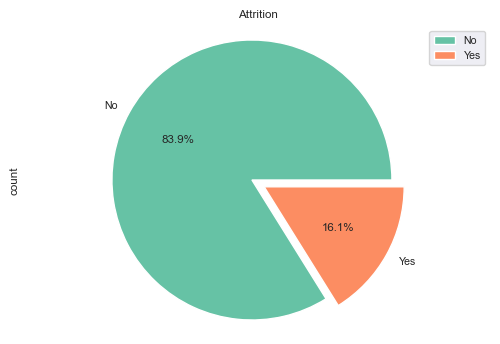

Attrition
No     2466
Yes     474
Name: count, dtype: int64


In [8]:
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0.1])
plt.title('Attrition')
plt.axis('equal')
plt.legend()
plt.show()
print(df['Attrition'].value_counts())


It's clear that we have **imbalance** data for the target variable. We will deal with it later.

In [9]:
good_features = []
ignored_features = []

In [10]:
# This is not optimized and not recommeneded for production use or large datasets
def explore_categorical(df, col, hue='Attrition', angle=0):
    # Set up the figure with a single subplot and two columns
    fig, axs = plt.subplots(1, 2, figsize=(13, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # Plot Pie chart (Distribution)
    axs[0].set_title(f"Distribution for {col}", fontweight="black", size=11, pad=15)
    plot_pie_chart(axs[0], value_counts)

    # Plot Stacked Bar plot (Attrition Rate)
    axs[1].set_title(f"{hue} Rate by {col}", fontweight="black", size=11, pad=15)
    plot_stacked_bar(axs[1], df, col, hue, angle)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

def plot_pie_chart(ax, value_counts):
    colors = sns.color_palette('Set2', len(value_counts))
    ax.pie(value_counts.values, labels=value_counts.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
           colors=colors, textprops={"size": 9.5})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    ax.add_artist(center_circle)

def plot_stacked_bar(ax, df, col, hue, angle):
    hue_counts = df.groupby([col, hue]).size().unstack()
    colors = sns.color_palette('Set2', n_colors=len(hue_counts.columns))
    hue_counts.plot(kind='bar', stacked=True, color=colors, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=angle)

    annotate_stacked_bars(ax, hue_counts)

def annotate_stacked_bars(ax, bar_plot):
    # Iterate over all of the bars in the plot

    bar_plot_rate = round(bar_plot['Yes'] / (bar_plot['No'] + bar_plot['Yes']) * 100, 1)
    for i, pos in enumerate(ax.patches[len(ax.patches)//2:]):
        # Find where everything is located
        height = pos.get_height()
        width = pos.get_width()
        x = pos.get_x()
        y = pos.get_y()

        # The width of the bar is the data value and can be used as the label
        label_text = f'{bar_plot_rate.iloc[i]:.1f}%'
        
        label_x = x + width / 2
        label_y = y + height / 2

        # don't include label if it's equivalently 0
        if width > 0:
            ax.text(label_x, label_y, label_text, ha='center', va='center_baseline', fontsize=10.5)      

def explore_numerical(df, col, hue='Attrition'):
    plt.figure(figsize=(13, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    plt.title(f"Distribution by {col}", fontweight="black", size=11, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=11, pad=10)
    plt.tight_layout()
    plt.show()    



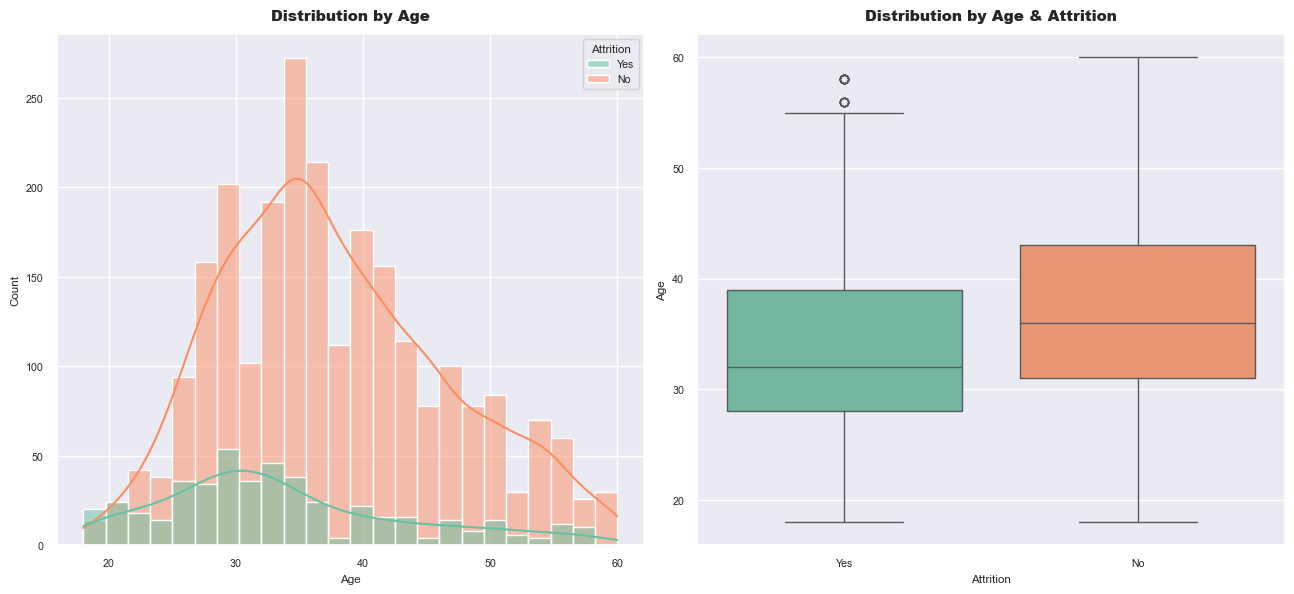

In [11]:
explore_numerical(df, 'Age')

- We can see that the distribution of 'Age' is a little right-skewed. Most of the employees are in the age group of 25-40.
- There is an overlap in the distribution of 'Age' for both the classes of 'Attrition'. However, the median age of employees who left the company is lower than the median age of employees who stayed in the company.


In [12]:
good_features.append('Age')

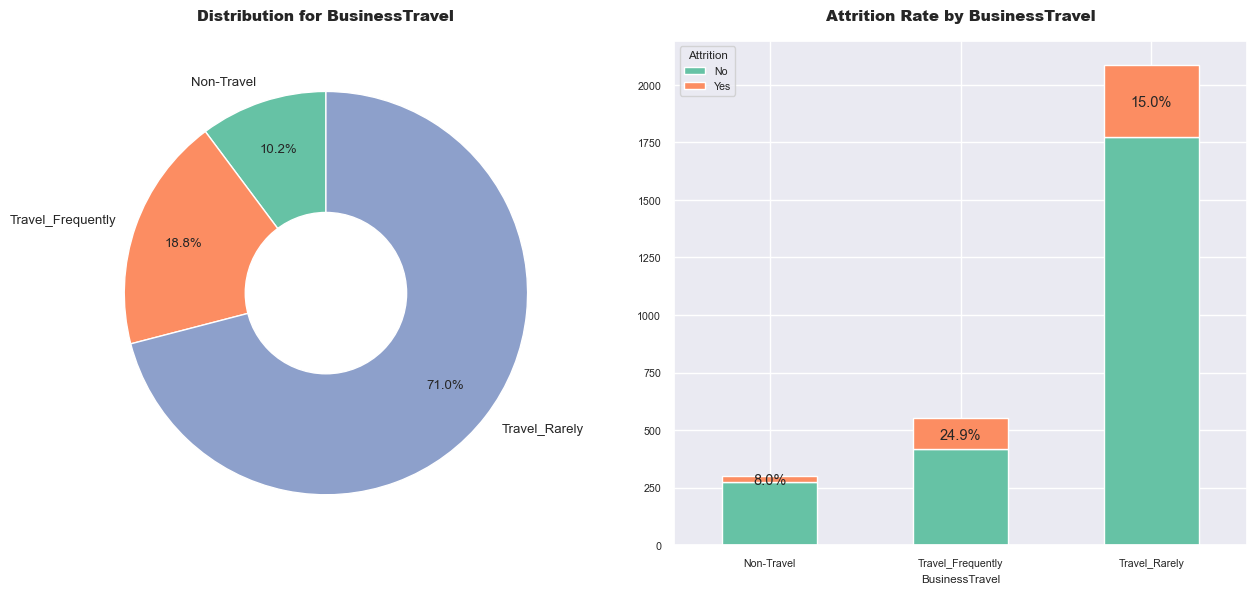

In [13]:
explore_categorical(df, 'BusinessTravel')

- 71% of the employees travel rarely , 18.8% of the employees travel frequently and the remaining percentage does not travel.
- Employees who do not travel are the least likely to leave the company.
- Employees who travel frequently are the most likely to leave the company.


In [14]:
good_features.append('BusinessTravel')

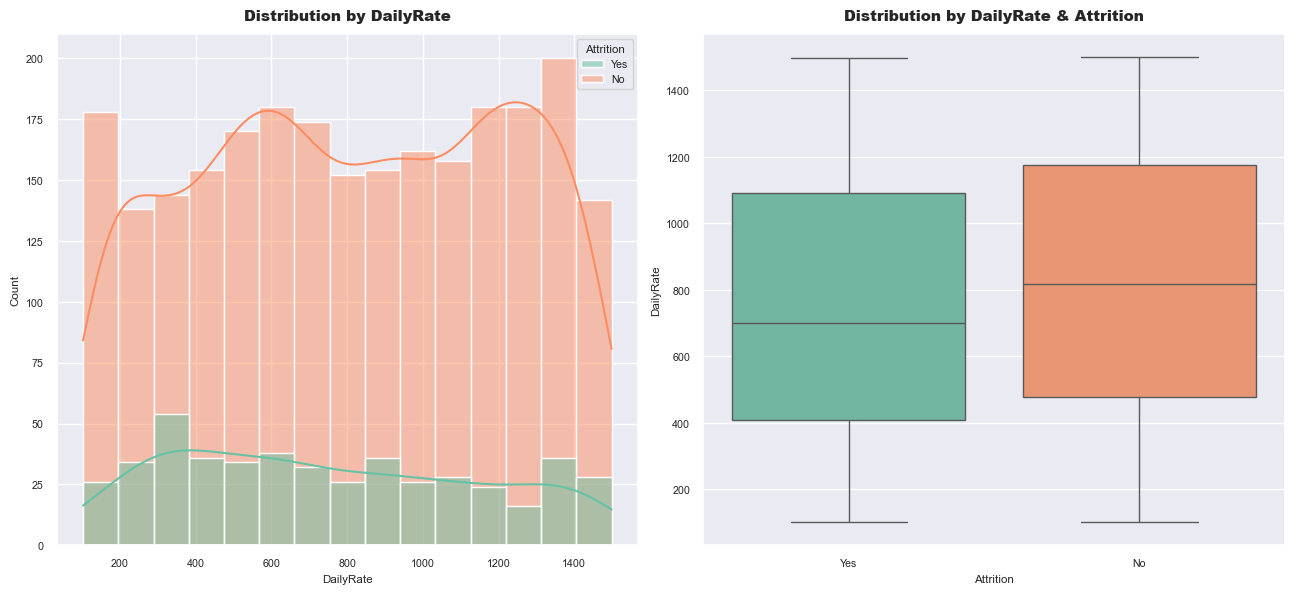

In [15]:
explore_numerical(df, 'DailyRate')

- There is a significant overlap in the distribution of DailyRate between the two groups so it is not a good predictor of Attrition

In [16]:
ignored_features.append('DailyRate')

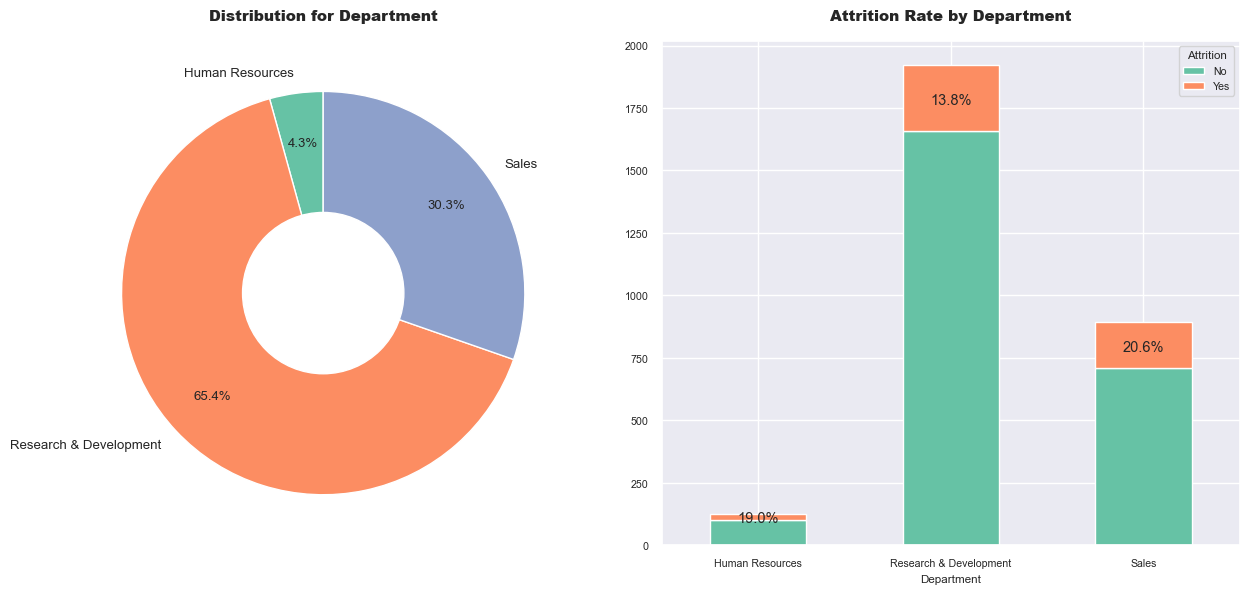

In [17]:
explore_categorical(df, 'Department')

- Research & Development has the highest number of employees and they are the least to leave the company
- HR and Sales have almost the same rate of attrition

In [18]:
good_features.append('Department')

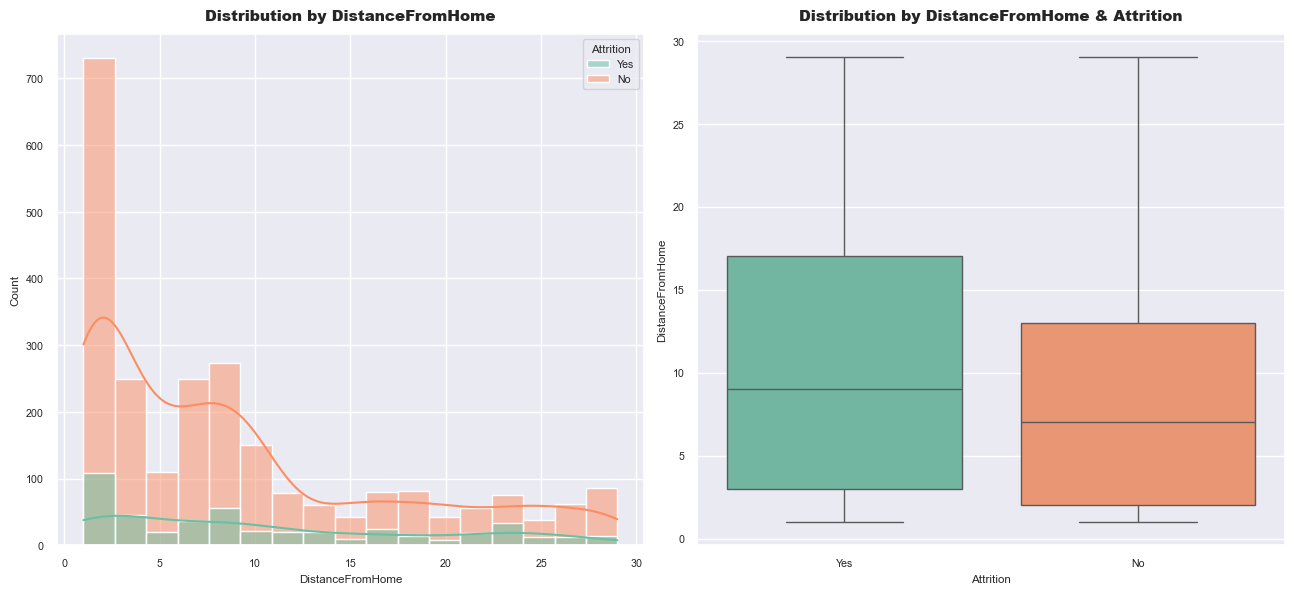

In [19]:
explore_numerical(df, 'DistanceFromHome')

- Most employees live within 10 km
- We can see that employees living far from work (more than 12k) are more likely to leave the company but there is an overlap between the two distributions   

In [20]:
good_features.append('DistanceFromHome')

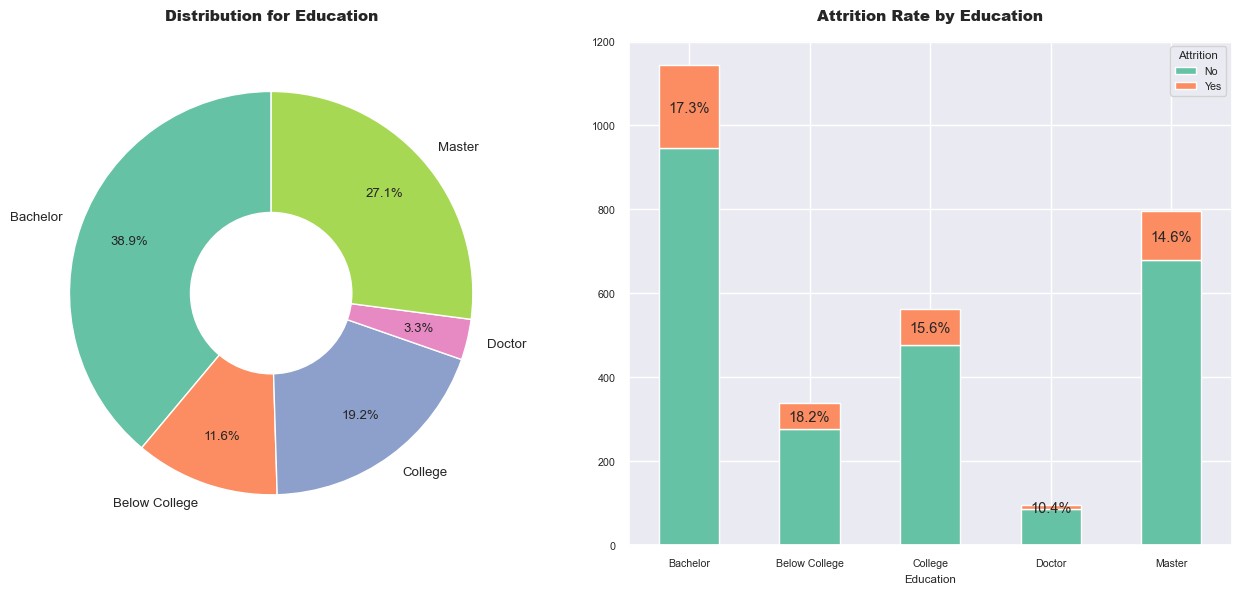

In [21]:
explore_categorical(df, 'Education')

- The attrition rates are close for all education levels except for doctorate which is the least.
- This could be because there are very few employees with doctorate degree.
- We can combine the doctorate and master degree into a single category.

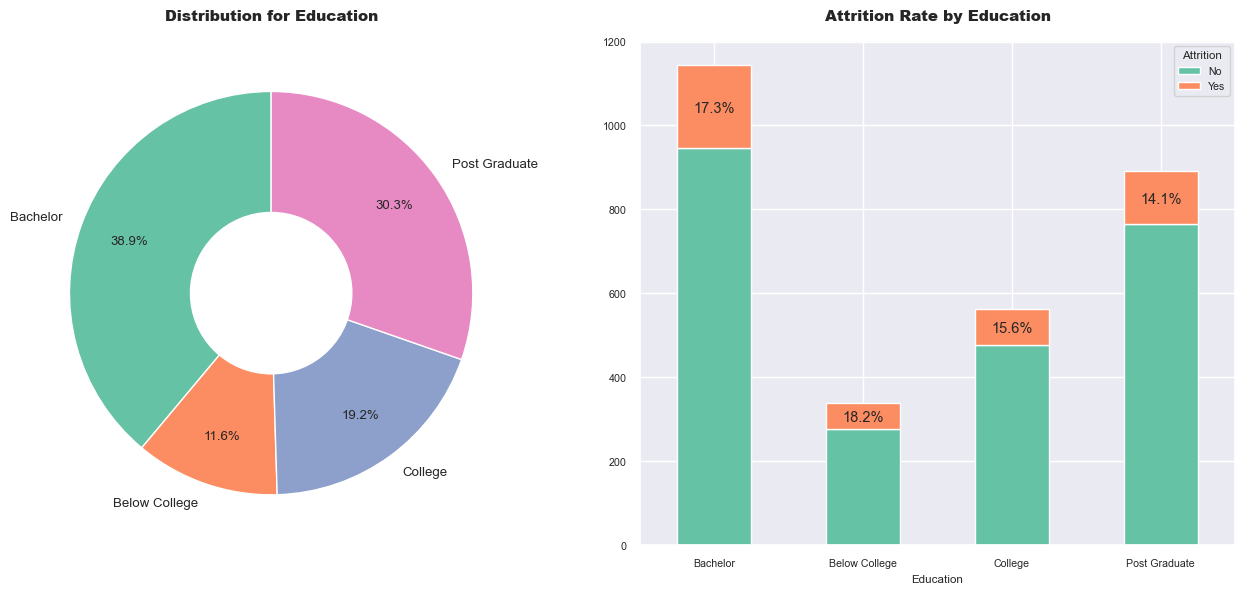

In [22]:
df['Education']=df['Education'].replace('Doctor','Master')
df['Education']= df['Education'].replace('Master','Post Graduate')
explore_categorical(df, 'Education')

- The ratios of attrition are similar for all education levels thus we should further investigate this feature
- May be not a good indicator for employees attrition

In [23]:
good_features.append('Education')

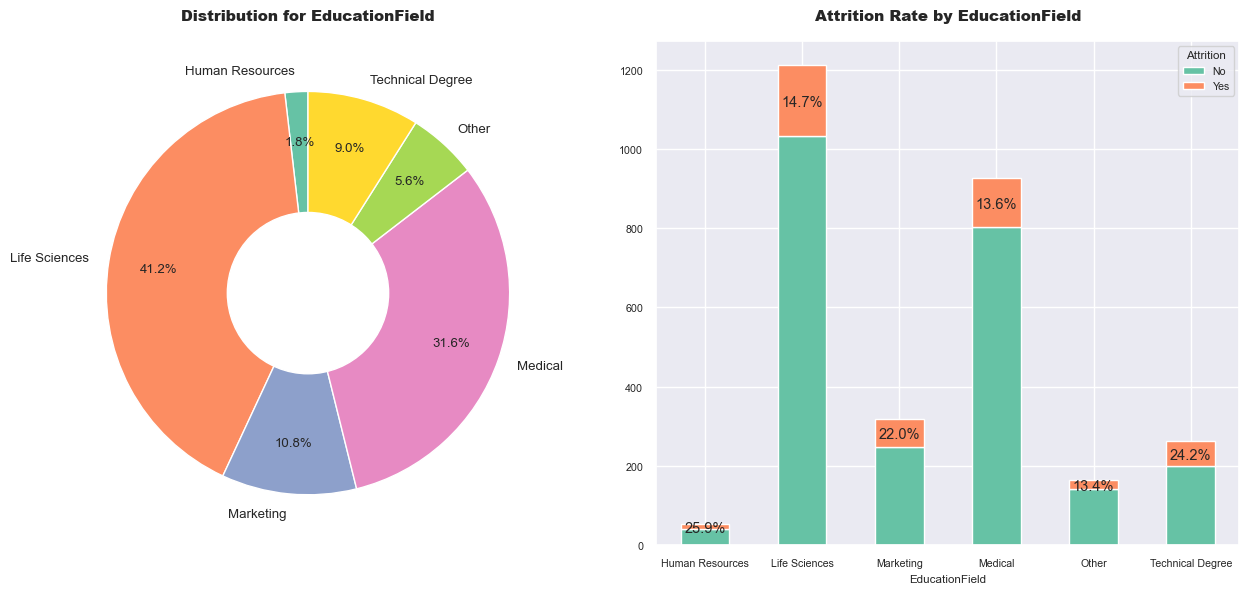

In [24]:
explore_categorical(df, 'EducationField')

- Medical and Life Sciences are the most common fields of education
- HR has the highest attrition rate but it has the least number of employees
- HR, Marketing and Technical Degree have the highest attrition rate
- Life Sciences, Medical and Other have the lowest attrition rate
- so we can group the fields of education into 2 categories
- 1. HR, Marketing and Technical Degree
- 2. Life Sciences, Medical and Other

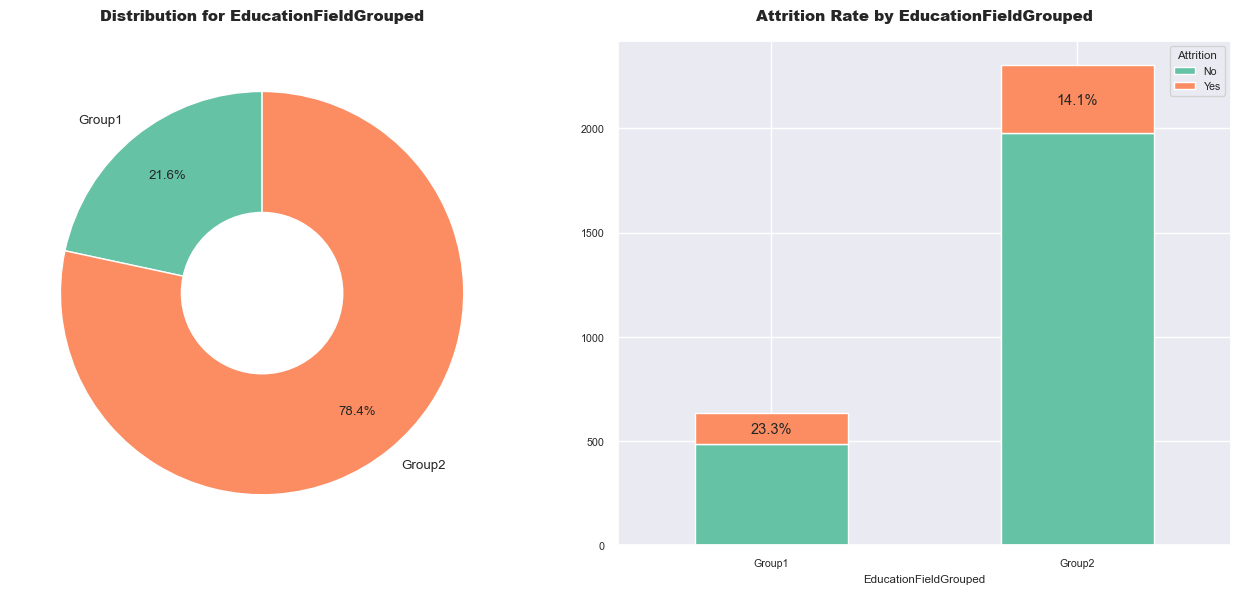

In [25]:
df['EducationFieldGrouped'] = df['EducationField'].replace(['Human Resources','Marketing','Technical Degree'], 'Group1')
df['EducationFieldGrouped'] = df['EducationFieldGrouped'].replace(['Life Sciences','Medical','Other'], 'Group2')
explore_categorical(df, 'EducationFieldGrouped')

In [26]:
good_features.append('EducationFieldGrouped')
df_original['EducationFieldGrouped'] = df['EducationFieldGrouped']

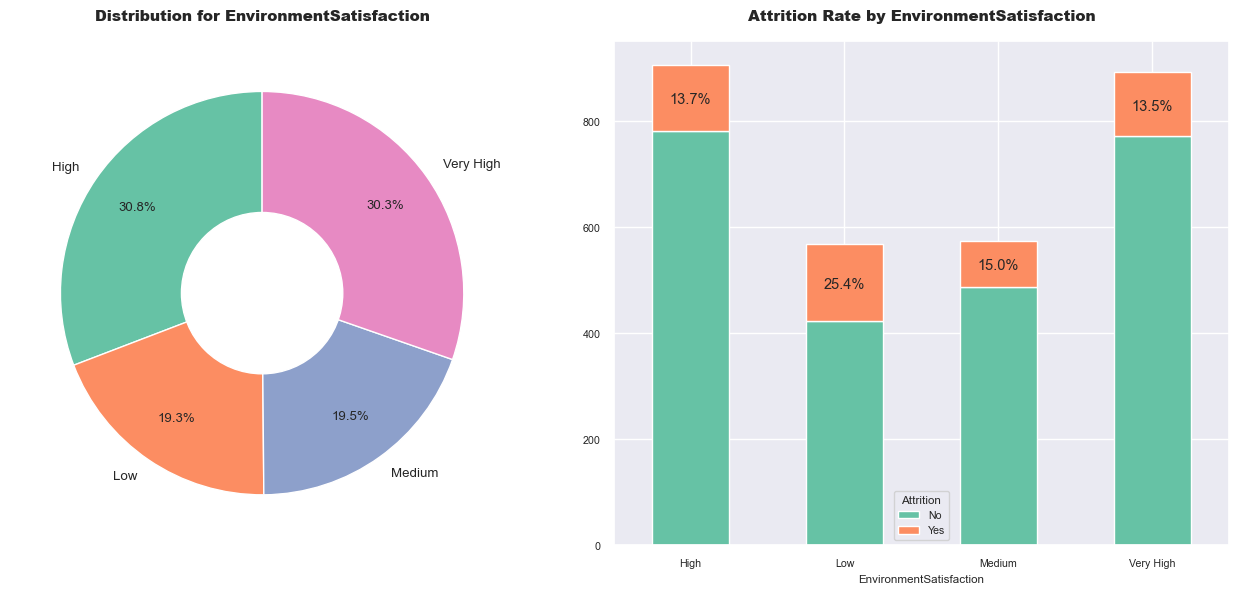

In [27]:
explore_categorical(df, 'EnvironmentSatisfaction')

- 61.1 % of employees are satisfied with their enviroment
- Emplyees with low environment satisfaction are more likely to leave the company
- Employees with higher environment satisfaction are less likely to leave the company

In [28]:
good_features.append('EnvironmentSatisfaction')

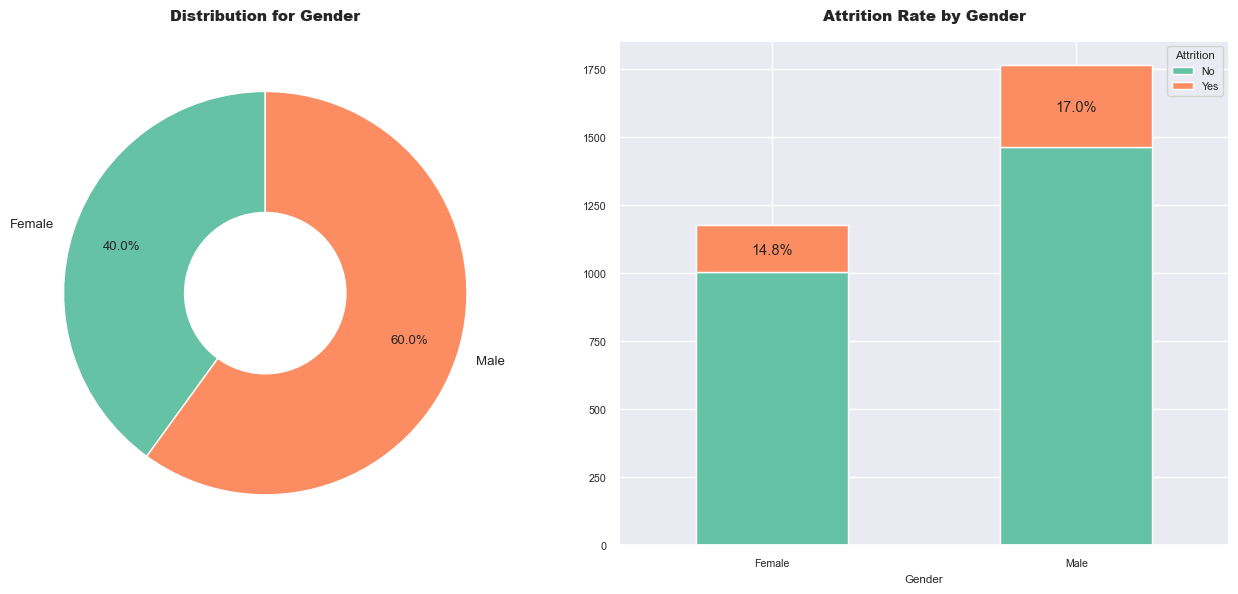

In [29]:
explore_categorical(df,'Gender')

- 60% of the employees are males and 40% are females
- Males attrition rate is 2.2% higher than females which is not significant but we should investigate this further and we leave it for now

In [30]:
ignored_features.append('Gender')

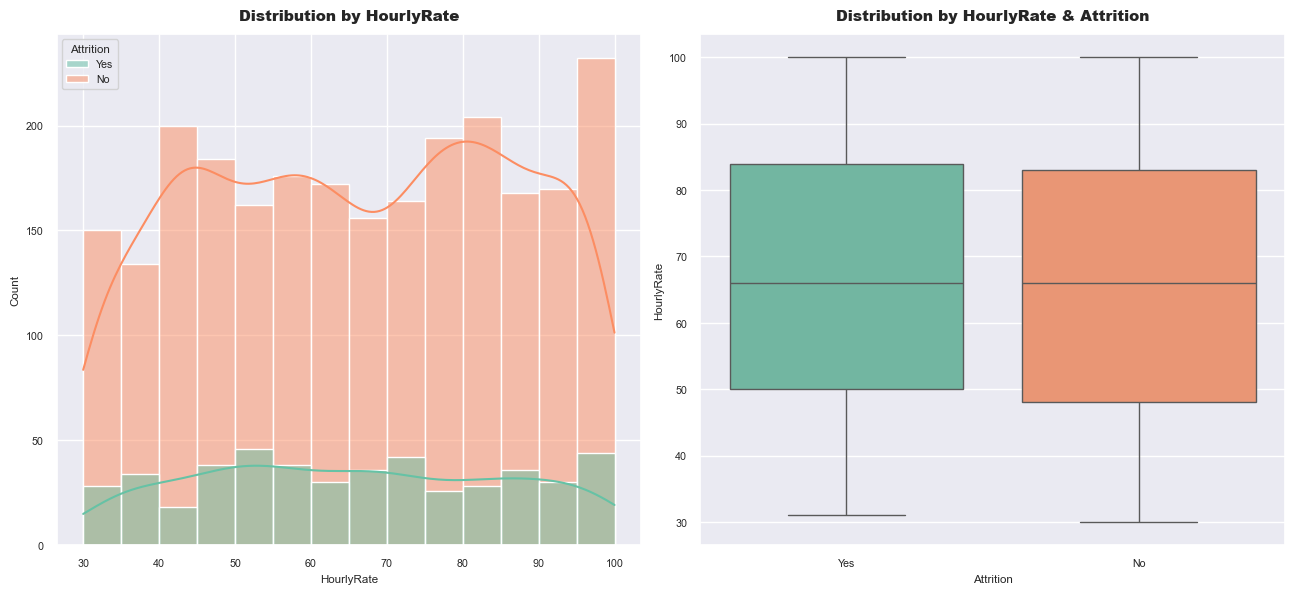

In [31]:
explore_numerical(df, 'HourlyRate')

- The distribution of the hourly rate is almost the same for both attrition groups

In [32]:
ignored_features.append('HourlyRate')

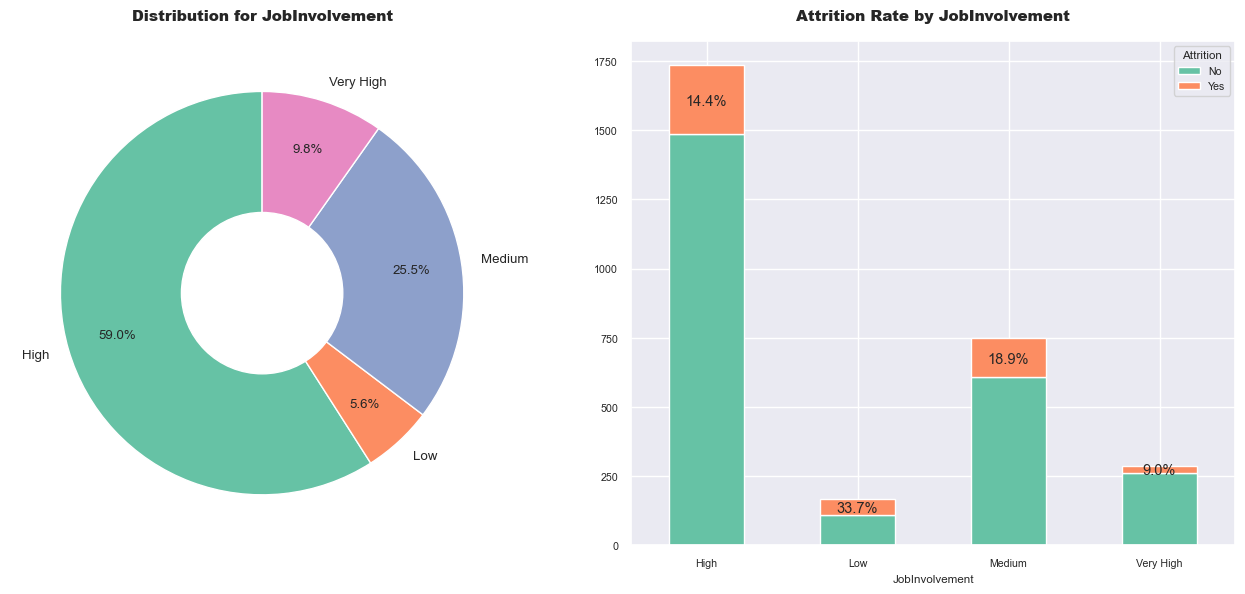

In [33]:
explore_categorical(df, 'JobInvolvement')

- We can see that the more the job involvement, the less the attrition rate

In [34]:
good_features.append('JobInvolvement')

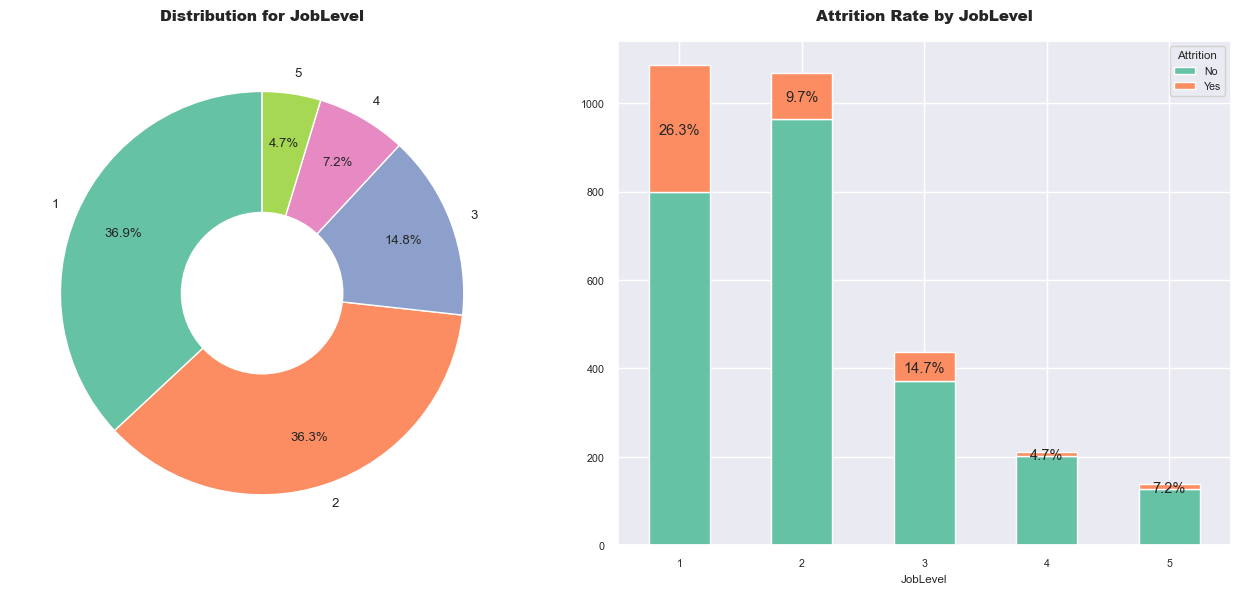

In [35]:
explore_categorical(df, 'JobLevel')

- We can see that the attrition rate is higher for lower job levels (<=2) and it decreases with if job level goes higher


In [36]:
good_features.append('JobLevel')

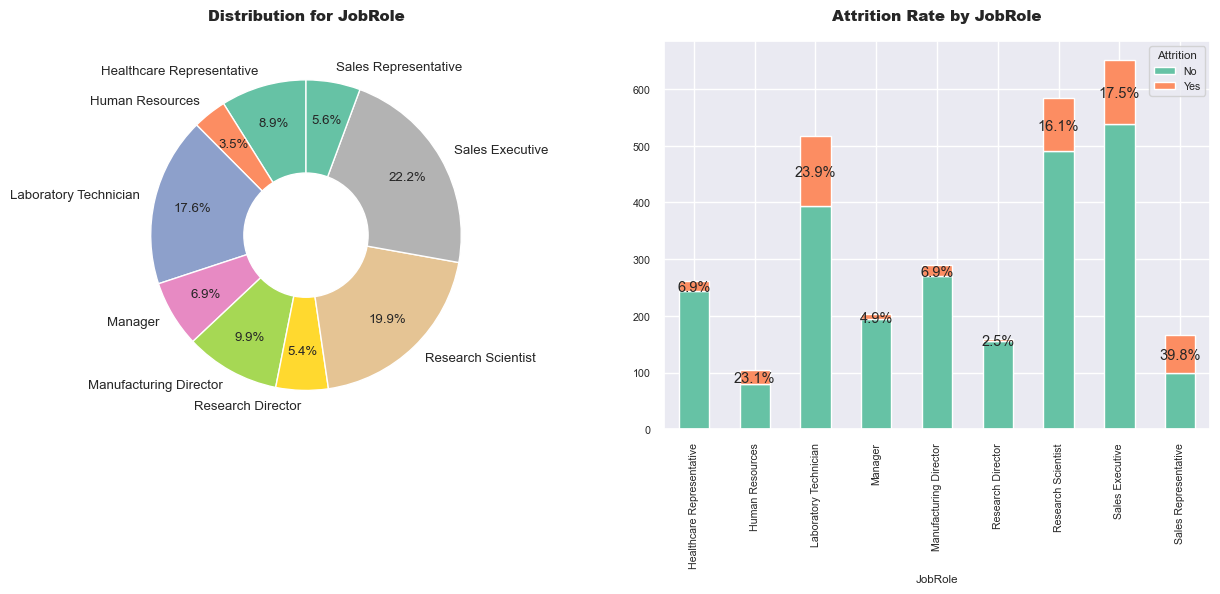

In [37]:
explore_categorical(df, 'JobRole', angle=90)

- There are 9 unique job roles. We can group them into 5 categories based on their attriation rate.
- JobRole1: Research Director
- JobRole2: Manufacturing Director, Manager, Healthcare Representative
- JobRole3: Research Scientist, Sales Executive
- JobRole4: Laboratory Technician, Human Resources
- JobRole5: Sales Representative


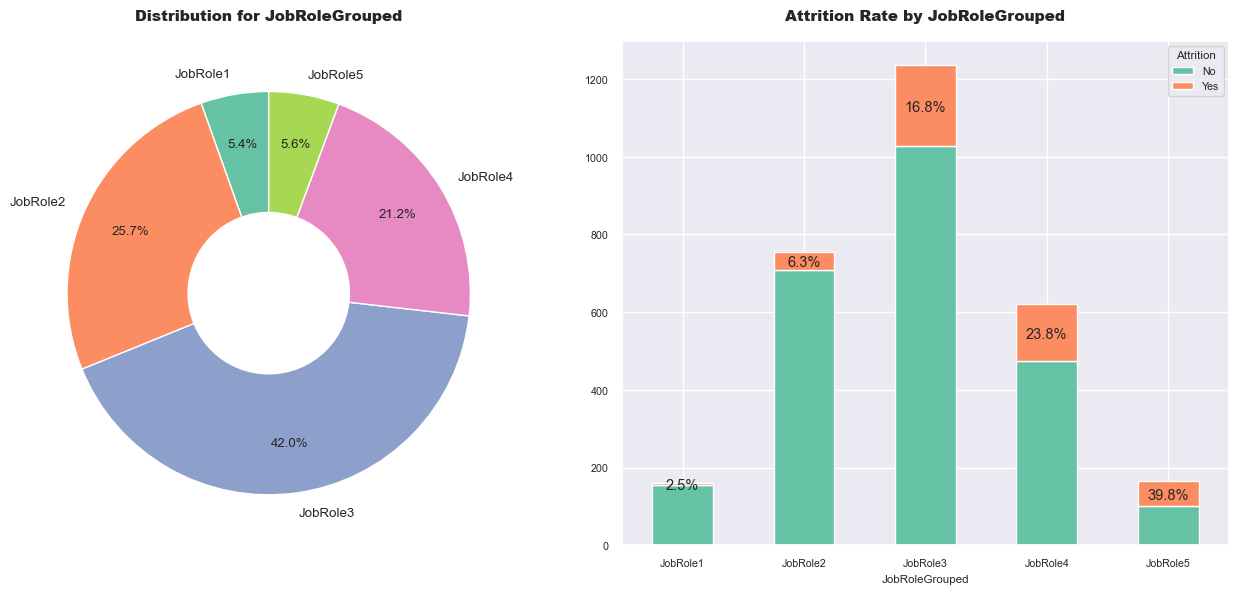

In [38]:
df['JobRoleGrouped'] = df['JobRole']
df['JobRoleGrouped'] = df['JobRoleGrouped'].replace(['Research Director'], 'JobRole1')
df['JobRoleGrouped'] = df['JobRoleGrouped'].replace(['Manufacturing Director','Manager','Healthcare Representative'], 'JobRole2')
df['JobRoleGrouped'] = df['JobRoleGrouped'].replace(['Research Scientist','Sales Executive'], 'JobRole3')
df['JobRoleGrouped'] = df['JobRoleGrouped'].replace(['Laboratory Technician','Human Resources'], 'JobRole4')
df['JobRoleGrouped'] = df['JobRoleGrouped'].replace(['Sales Representative'], 'JobRole5')
explore_categorical(df, 'JobRoleGrouped')

In [39]:
good_features.append('JobRoleGrouped')
df_original['JobRoleGrouped'] = df['JobRoleGrouped']

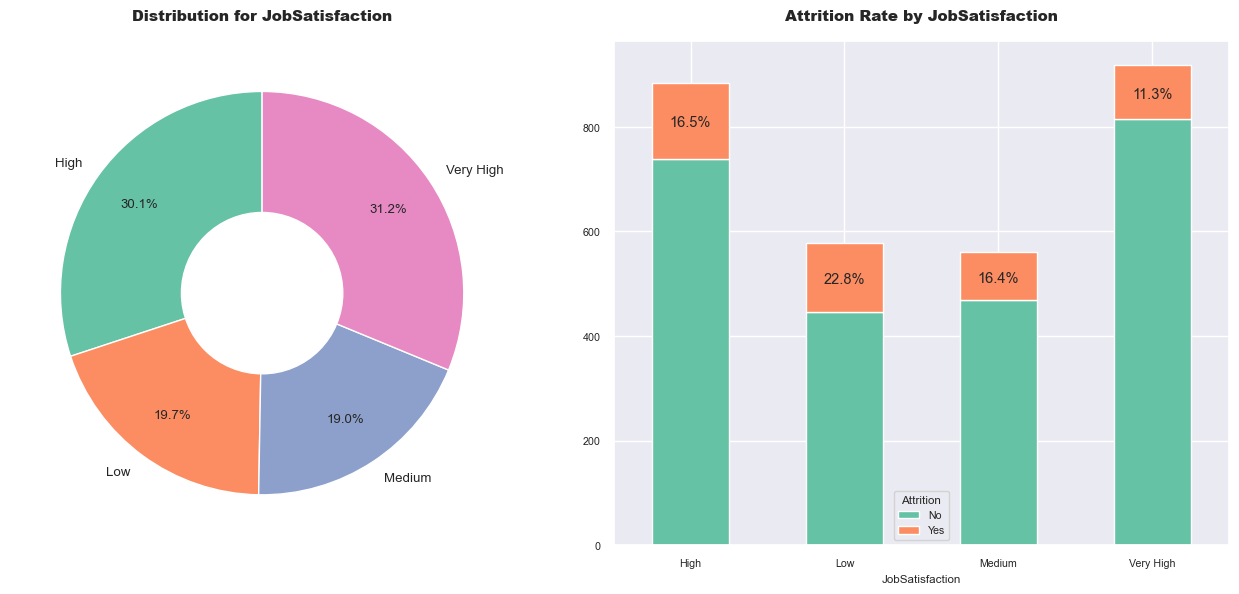

In [40]:
explore_categorical(df, 'JobSatisfaction')

- The higher job satisfaction the lower the attrition rate

In [41]:
good_features.append('JobSatisfaction')

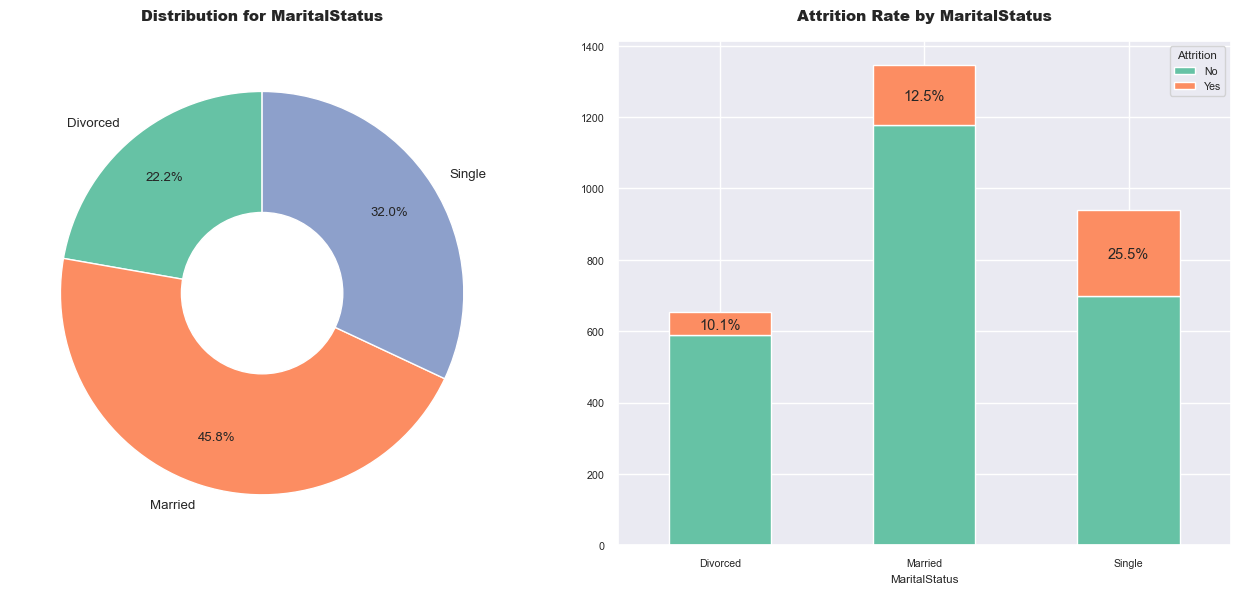

In [42]:
explore_categorical(df, 'MaritalStatus')

- Most of the employees are married
- Single employees tend to leave the company more

In [43]:
good_features.append('MaritalStatus')

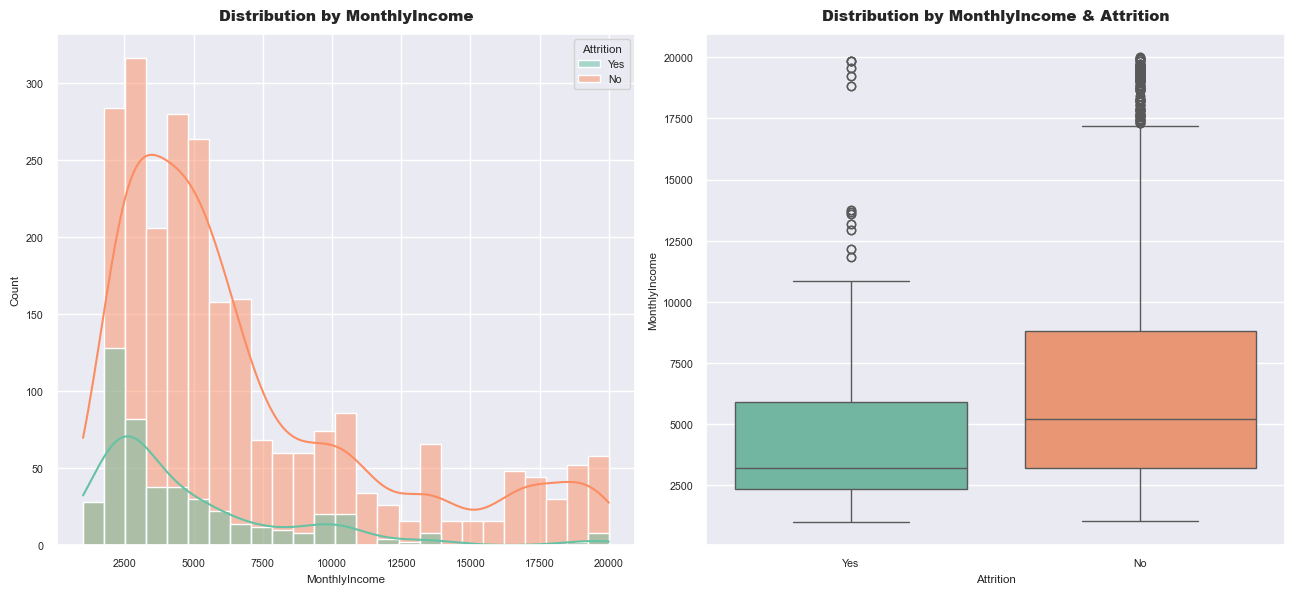

In [44]:
explore_numerical(df, 'MonthlyIncome') 

- The higher monthly income the lower the attrition rate and vice verca

In [45]:
good_features.append('MonthlyIncome')

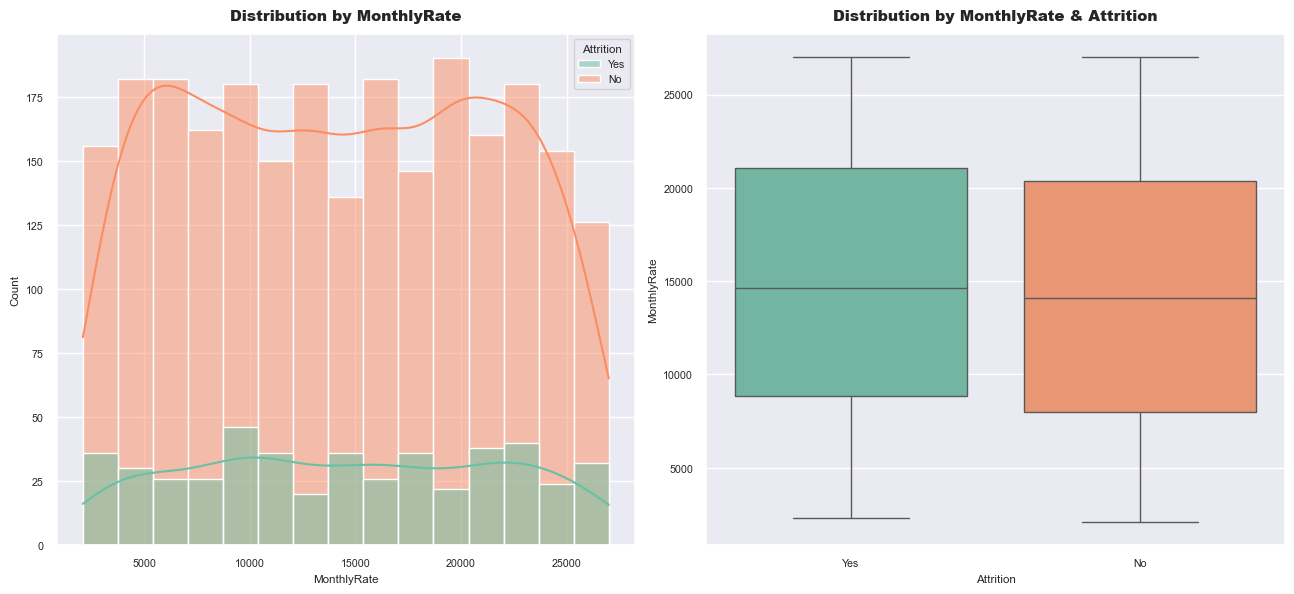

In [46]:
explore_numerical(df, 'MonthlyRate')

- There is a significant overlap between the two distributions so we can ignore this feature

In [47]:
ignored_features.append('MonthlyRate')

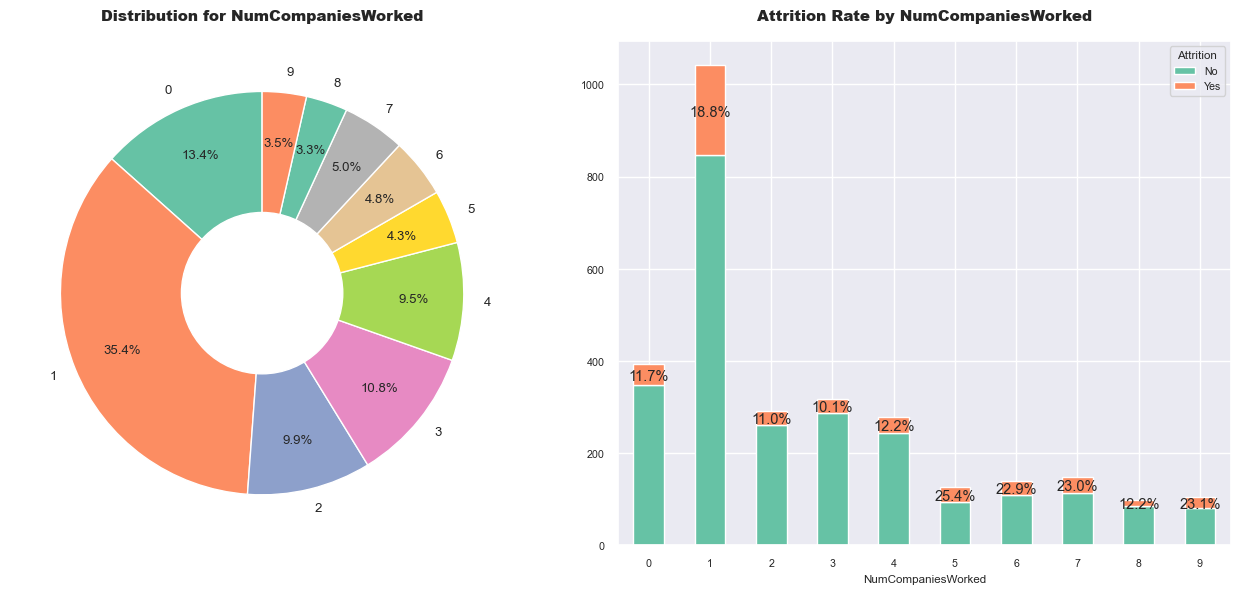

In [48]:
explore_categorical(df, 'NumCompaniesWorked')

- Most of the employees worked for 2 or less companies
- There is an increase in attrition rate for those who worked for 5 companies or more

In [49]:
good_features.append('NumCompaniesWorked')

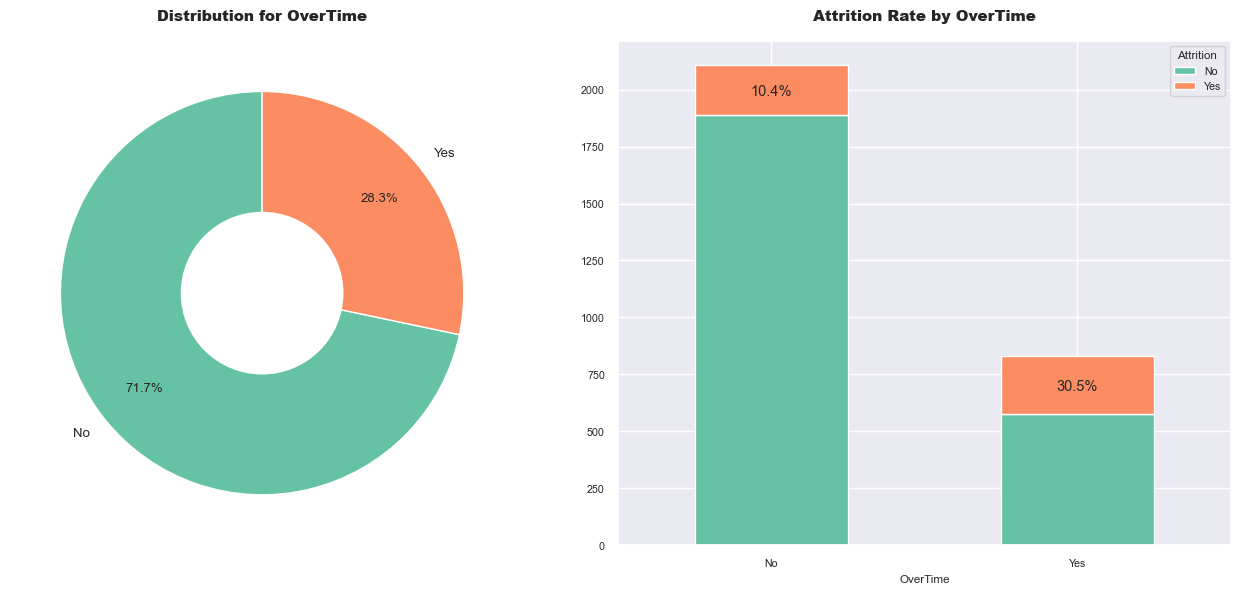

In [50]:
explore_categorical(df,'OverTime')

- It's clear that employees who work over time are more likely to leave the company

In [51]:
good_features.append('OverTime')

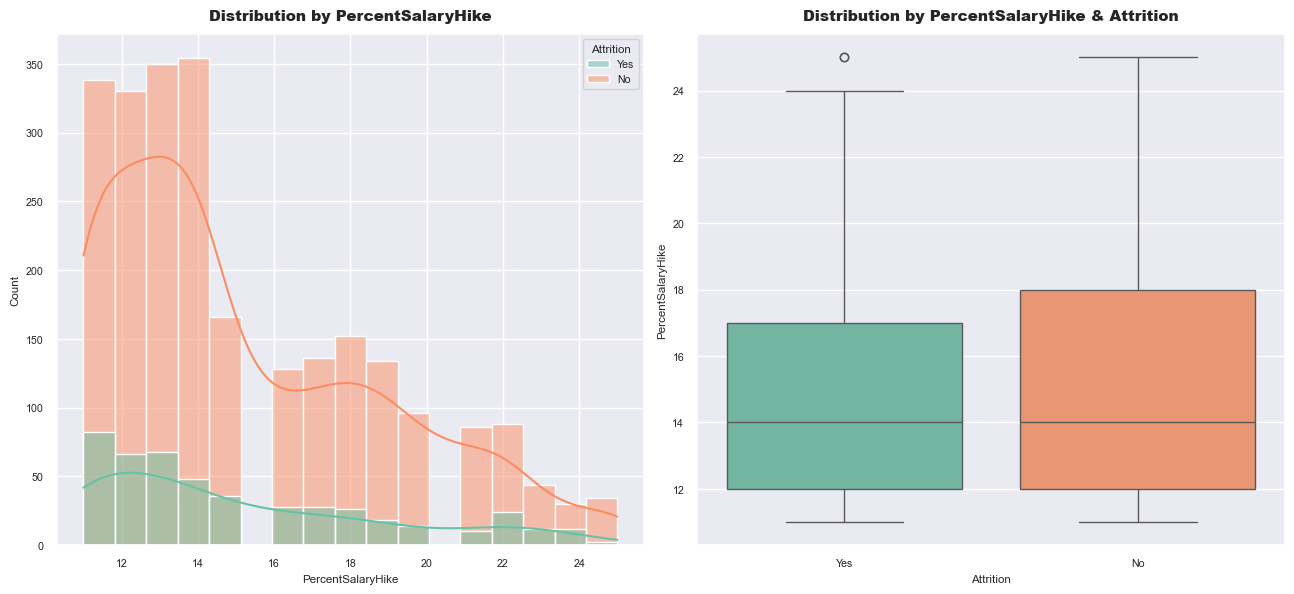

In [52]:
explore_numerical(df,'PercentSalaryHike')

- Few employees receive a substantial salary hike.
- Higher percent salary increases correspond to lower attrition rates.

In [53]:
good_features.append('PercentSalaryHike')

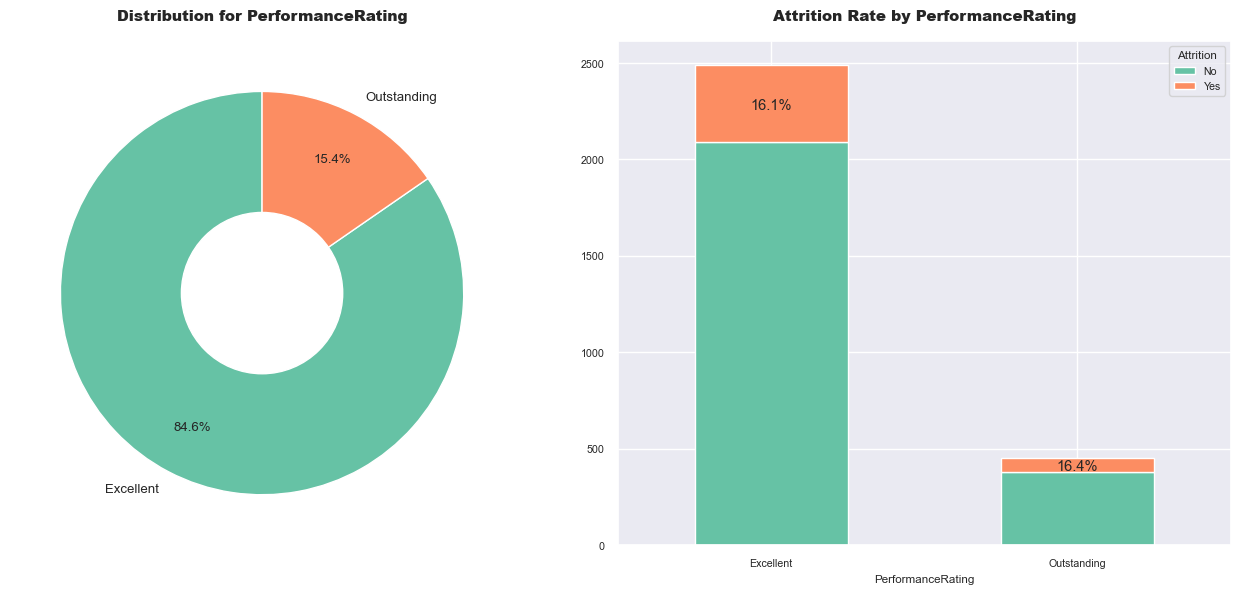

In [54]:
explore_categorical(df,'PerformanceRating')

- Employees are only rated into 2 good categories only which is questionable
- Both groups have almost the same attrition rate so we ignore this feature

In [55]:
ignored_features.append('PerformanceRating')

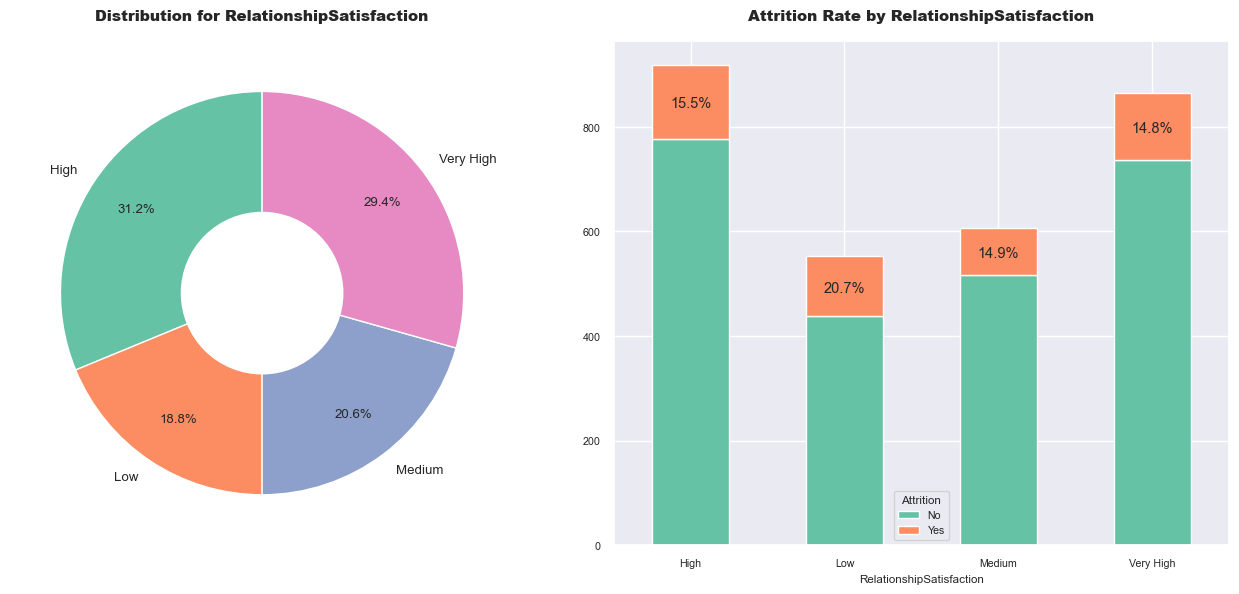

In [56]:
explore_categorical(df,'RelationshipSatisfaction')

- Low number of employees have low relationship satisfaction
- Low Satisfied employees tend to leave the company more

In [57]:
good_features.append('RelationshipSatisfaction')

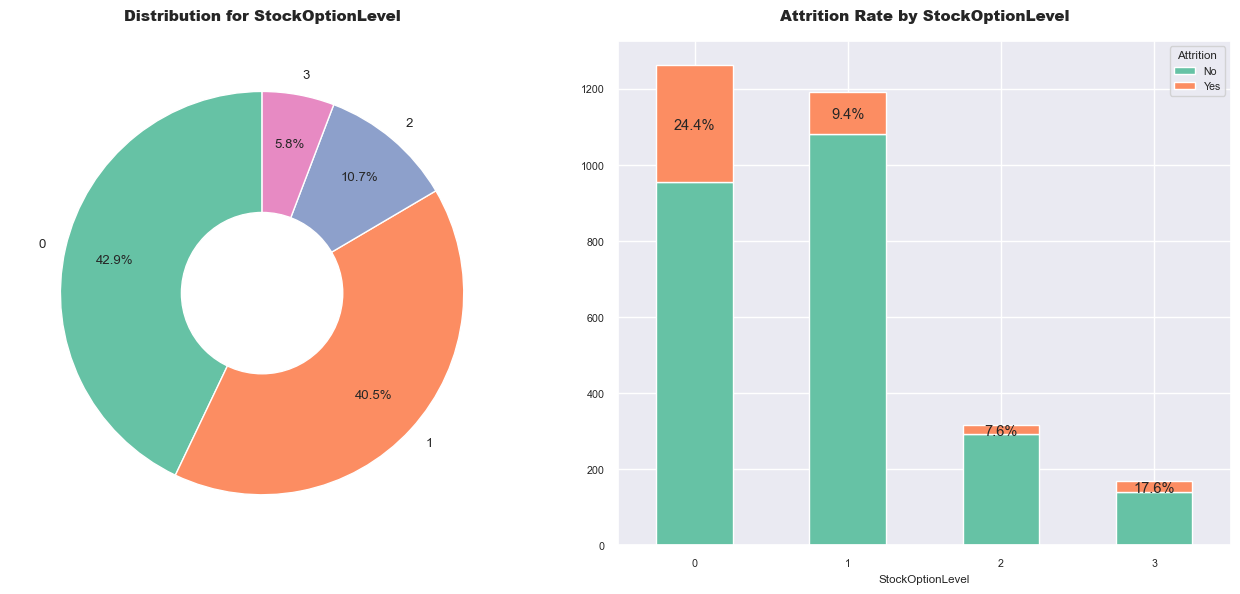

In [58]:
explore_categorical(df,'StockOptionLevel')

- Stock options level 0 and level 1 are the most common
- Stock options level 1 and level 2 have lower attrition rates
- Stock option level 0 has the highest attrition rate 24.4%

In [59]:
good_features.append('StockOptionLevel')

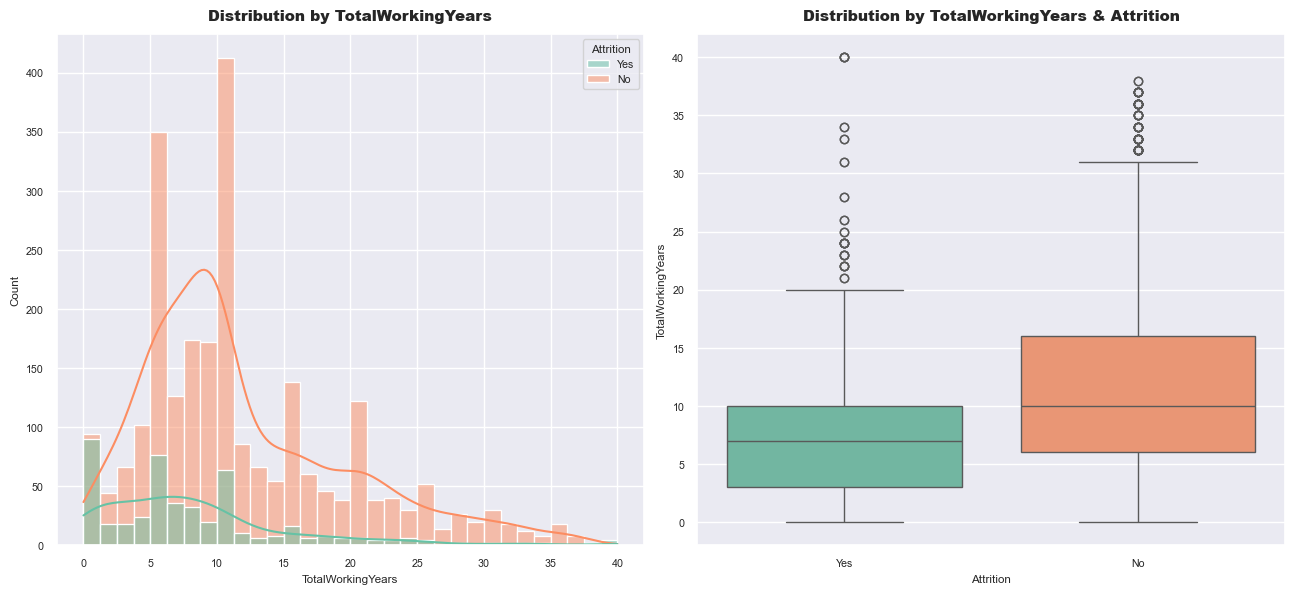

In [60]:
explore_numerical(df,'TotalWorkingYears')

- The more experienced employees tend to stay at the company more

In [61]:
good_features.append('TotalWorkingYears')

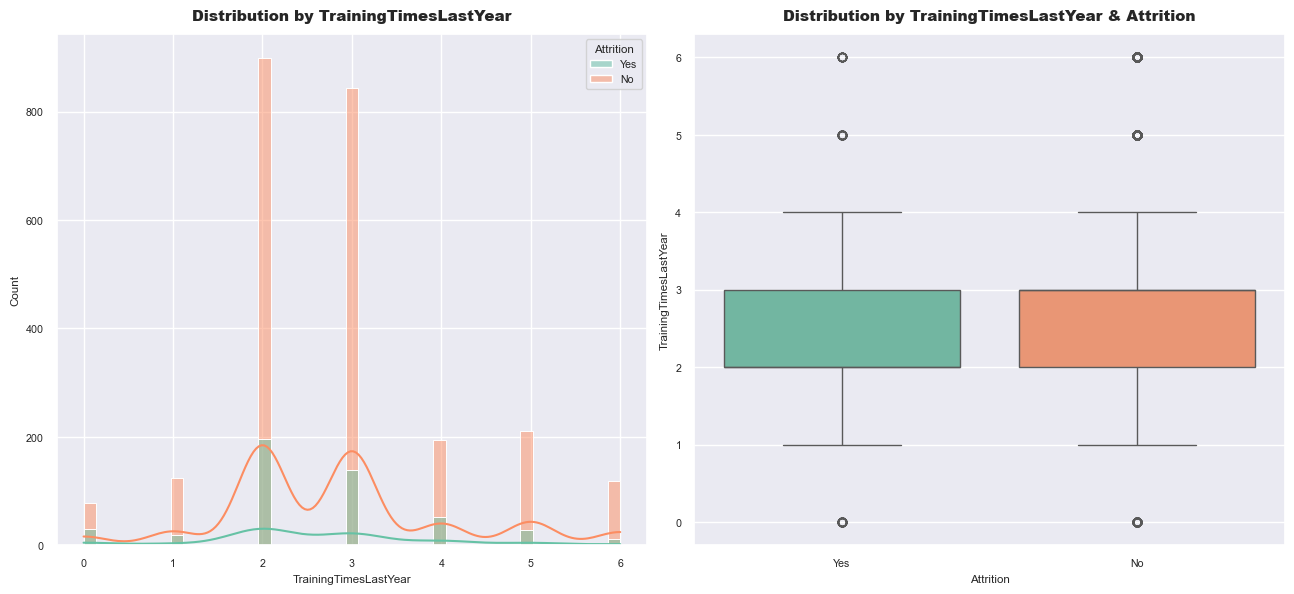

In [62]:
explore_numerical(df,'TrainingTimesLastYear')

- Most employees attended training 2 or 3 times last year
- The significant overlap between the 2 groups indicates that we should ignore this feature

In [63]:
ignored_features.append('TrainingTimesLastYear')

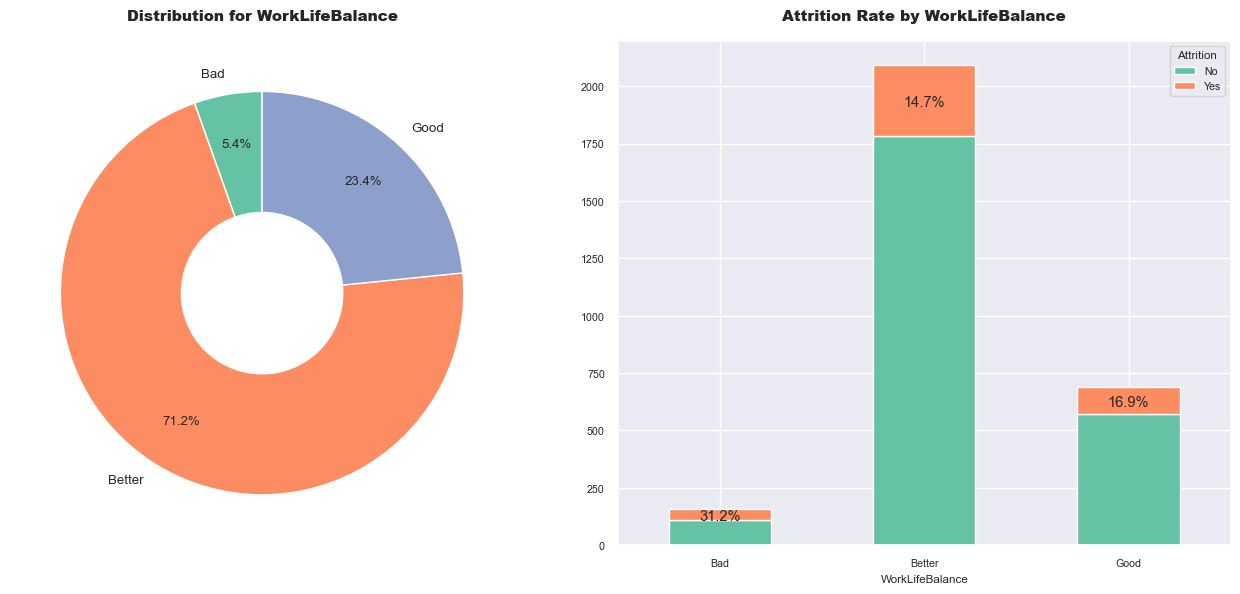

In [64]:
explore_categorical(df,'WorkLifeBalance')

- Most of the employees have good or better work life balance
- Almost 1/3rd of the employees with bad work life balance leave the company

In [65]:
good_features.append('WorkLifeBalance')

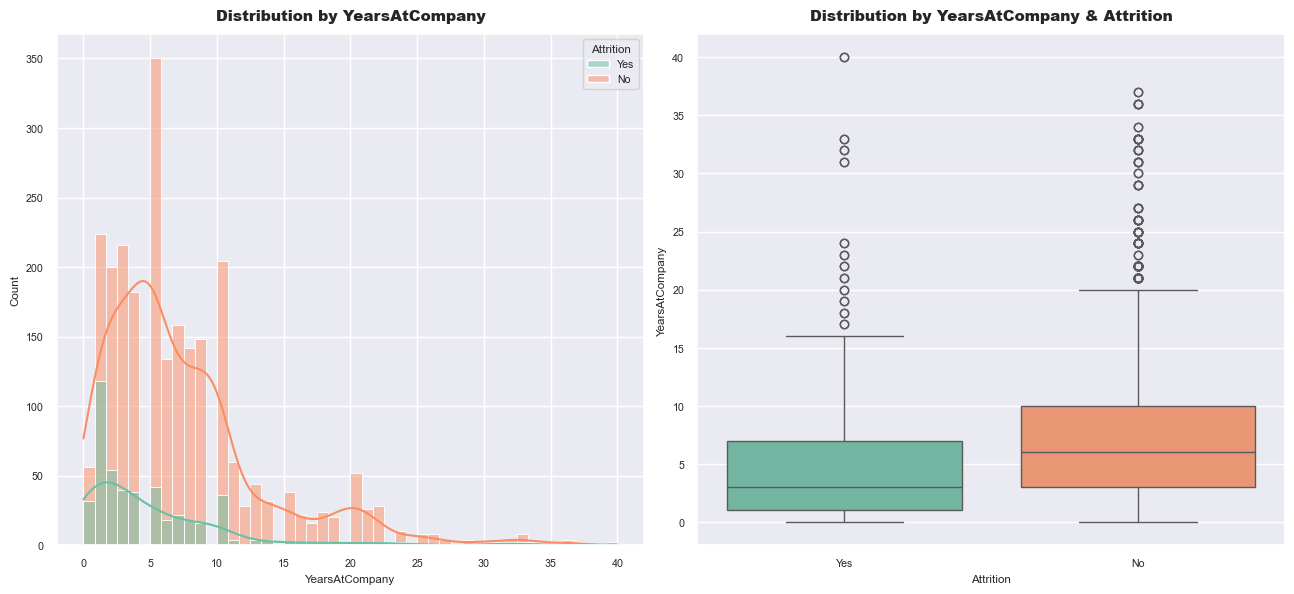

In [66]:
explore_numerical(df,'YearsAtCompany')

- The more years spent at the company the less likely to leave it 

In [67]:
good_features.append('YearsAtCompany')

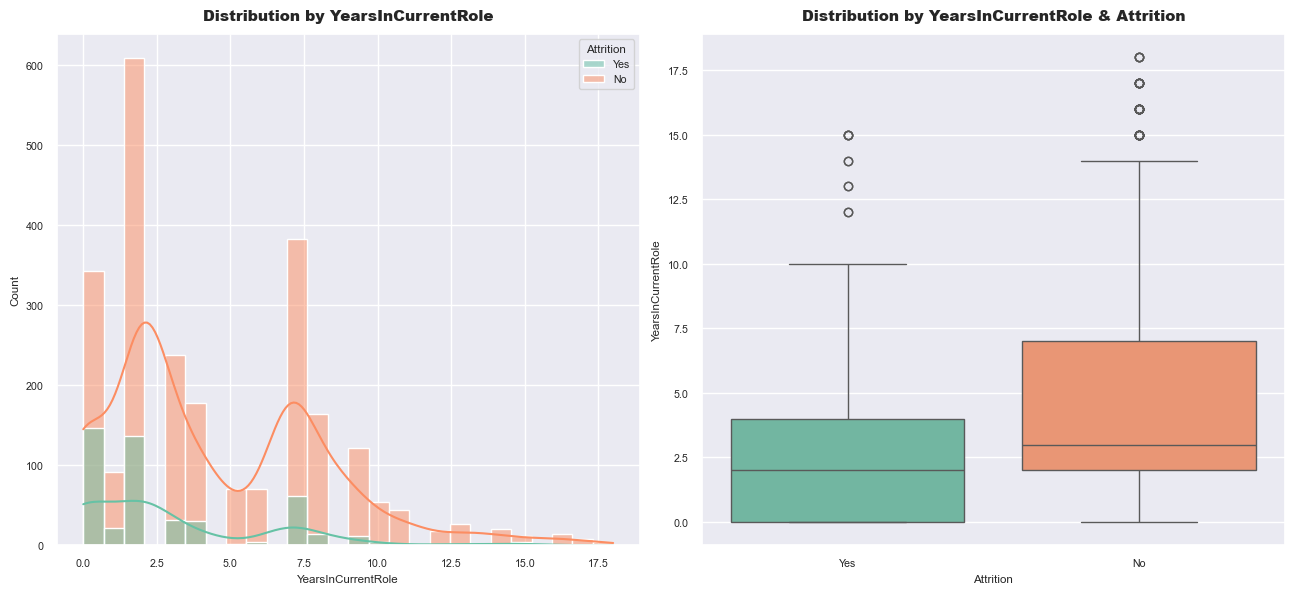

In [68]:
explore_numerical(df,'YearsInCurrentRole')

- It's clear that the more years employee spend in current role, the less likely to leave the company
- Highest Attrition is in the first two year of the current role.

In [69]:
good_features.append('YearsInCurrentRole')

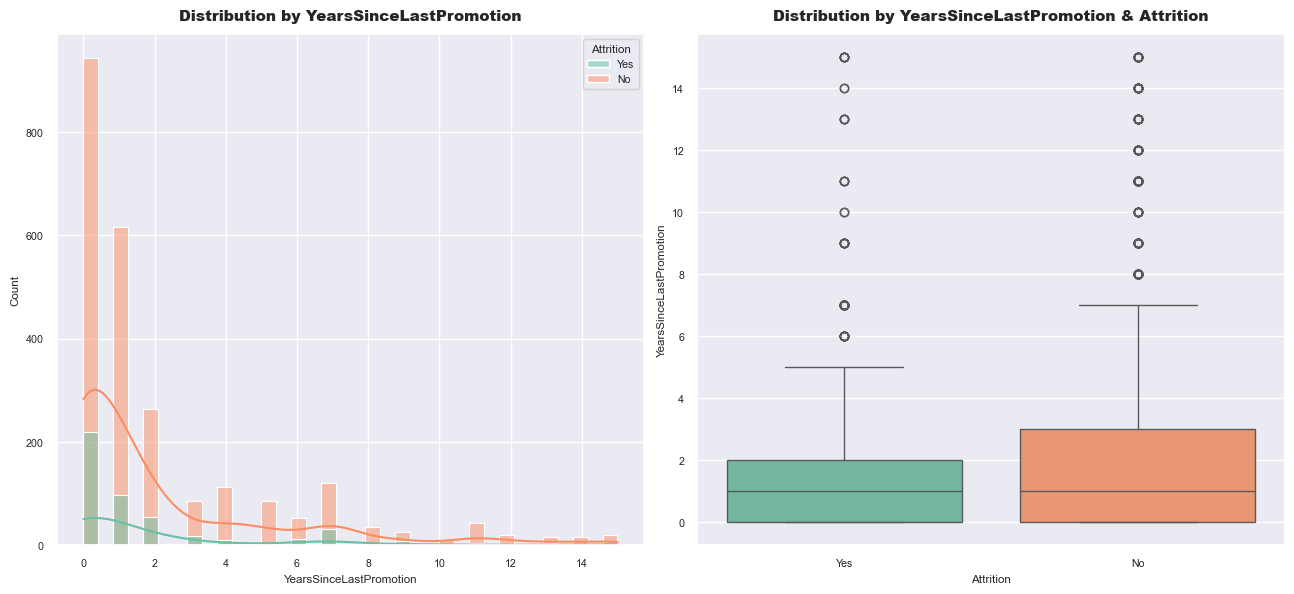

In [70]:
explore_numerical(df,'YearsSinceLastPromotion')

- Most of the employees who left, have been promoted recently
- There are many outliers in this variable
- There is an overlap between the 2 groups, we may further investigate this feature

In [71]:
good_features.append('YearsSinceLastPromotion')

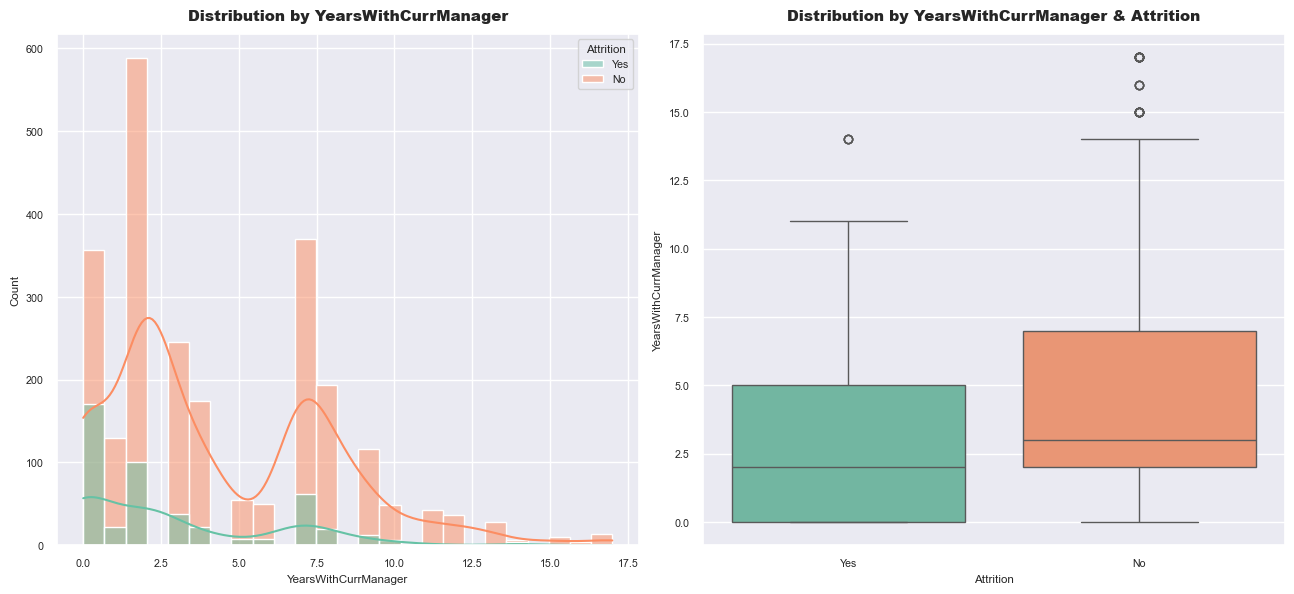

In [72]:
explore_numerical(df,'YearsWithCurrManager')

- The more years spent with current manager, the less likely for employees to leave

In [73]:
good_features.append('YearsWithCurrManager')

### Good Features Identified:
- 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationFieldGrouped', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRoleGrouped', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'YearsSinceLastPromotion'

### Features with Limited Contribution to Attrition:
- 'DailyRate', 'HourlyRate', 'MonthlyRate', 'PerformanceRating', 'TrainingTimesLastYear', 'Gender'

### Features Not Useful for Analysis:
- 'EmployeeNumber', 'Over18', 'StandardHours'



In [74]:
numerical_features = ['Age', 'DailyRate' ,'DistanceFromHome', 'HourlyRate' ,'MonthlyIncome','MonthlyRate' ,'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear','JobLevel', 'StockOptionLevel']
categorical_features = ['BusinessTravel', 'Department', 'Education', 'EducationFieldGrouped', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRoleGrouped', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Gender', 'PerformanceRating']
# we split them for easier encoding later on
nominal_cat = ['Attrition','Department', 'EducationFieldGrouped','JobRoleGrouped', 'MaritalStatus', 'OverTime', 'Gender']
ordinal_cat = np.setdiff1d(categorical_features, nominal_cat).tolist()
df = df_original.copy()
df.drop(columns=['JobRole','EducationField'], inplace=True)


In [75]:
df["Attrition"] = df["Attrition"].replace({"No":0,"Yes":1})
df["BusinessTravel"] = df["BusinessTravel"].replace({"Non-Travel":0,"Travel_Rarely":1,"Travel_Frequently":2})


In [76]:
df[nominal_cat].dtypes

Attrition                 int64
Department               object
EducationFieldGrouped    object
JobRoleGrouped           object
MaritalStatus            object
OverTime                 object
Gender                   object
dtype: object

## Feature Selection



### ANOVA: Analysis of Variance

In [77]:
# Create a list to store DataFrames for each feature beacuse append is deprecated and we have to use concat
dfs = []
# Perform ANOVA test for each numerical feature
for feature in numerical_features:
    groups = [group[1] for group in df.groupby('Attrition')[feature]]
    anova_result = stats.f_oneway(*groups)
    
    feature_df = pd.DataFrame({'Feature': [feature], 'F-Statistic': [anova_result.statistic], 'P-Value': [anova_result.pvalue]})
    
    dfs.append(feature_df)

anova_df = pd.concat(dfs, ignore_index=True)

anova_df["P-Value"] = anova_df["P-Value"].round(3)
anova_df.sort_values('F-Statistic' ,ascending=False)

,Feature,F-Statistic,P-Value
8,TotalWorkingYears,88.565272,0.000
14,JobLevel,86.489564,0.000
10,YearsInCurrentRole,77.729519,0.000
4,MonthlyIncome,77.030075,0.000
0,Age,76.403784,0.000
12,YearsWithCurrManager,73.474640,0.000
15,StockOptionLevel,56.319340,0.000
9,YearsAtCompany,54.040034,0.000
2,DistanceFromHome,17.948772,0.000
13,TrainingTimesLastYear,10.430392,0.001


In [78]:
to_drop = anova_df[anova_df['P-Value'] > 0.05]['Feature'].tolist()
print("Dropping features: ", to_drop)
numerical_features = np.setdiff1d(numerical_features, to_drop).tolist()

Dropping features:  ['HourlyRate', 'MonthlyRate', 'PercentSalaryHike', 'YearsSinceLastPromotion']


### Chi-squared test

In [79]:
def chi_test(df, features_list,target_column='Attrition'):   
    chi2_results_list = []

    for feature in features_list:
        # Create a contingency table
        contingency_table = pd.crosstab(df[target_column], df[feature])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        variable_result = pd.DataFrame({
            'Variable': [feature],
            'Chi2-Statistic': [chi2_stat],
            'P-Value': [p_value],
            'Degrees_of_Freedom': [dof]
        })
        
        chi2_results_list.append(variable_result)

    chi2_results = pd.concat(chi2_results_list, ignore_index=True)

    chi2_results["P-Value"] = chi2_results["P-Value"].round(3)
    return chi2_results.sort_values('Chi2-Statistic' ,ascending=False)

chi_results = chi_test(df, categorical_features)
chi_results

,Variable,Chi2-Statistic,P-Value,Degrees_of_Freedom
9,OverTime,176.605073,0.000,1
6,JobRoleGrouped,171.460824,0.000,4
8,MaritalStatus,92.327353,0.000,2
5,JobInvolvement,56.984042,0.000,3
0,BusinessTravel,48.364827,0.000,2
4,EnvironmentSatisfaction,45.007763,0.000,3
7,JobSatisfaction,35.010154,0.000,3
11,WorkLifeBalance,32.650194,0.000,3
3,EducationFieldGrouped,29.992126,0.000,1
1,Department,21.592015,0.000,2


In [80]:
to_drop_cat = chi_results[chi_results['P-Value'] > 0.05]['Variable'].tolist()
to_drop += to_drop_cat
print("Dropping features: ", to_drop_cat)
categorical_features = np.setdiff1d(categorical_features, to_drop_cat).tolist()
nominal_cat = np.setdiff1d(nominal_cat, to_drop_cat).tolist()
ordinal_cat = np.setdiff1d(ordinal_cat, to_drop_cat).tolist()

Dropping features:  ['Education', 'Gender', 'PerformanceRating']


In [81]:
df.drop(columns=to_drop, inplace=True)
df = df_encoded = pd.get_dummies(df, columns=nominal_cat[1:], drop_first=True)
df.shape

(2940, 29)

<Axes: title={'center': 'Correlation Plot'}>

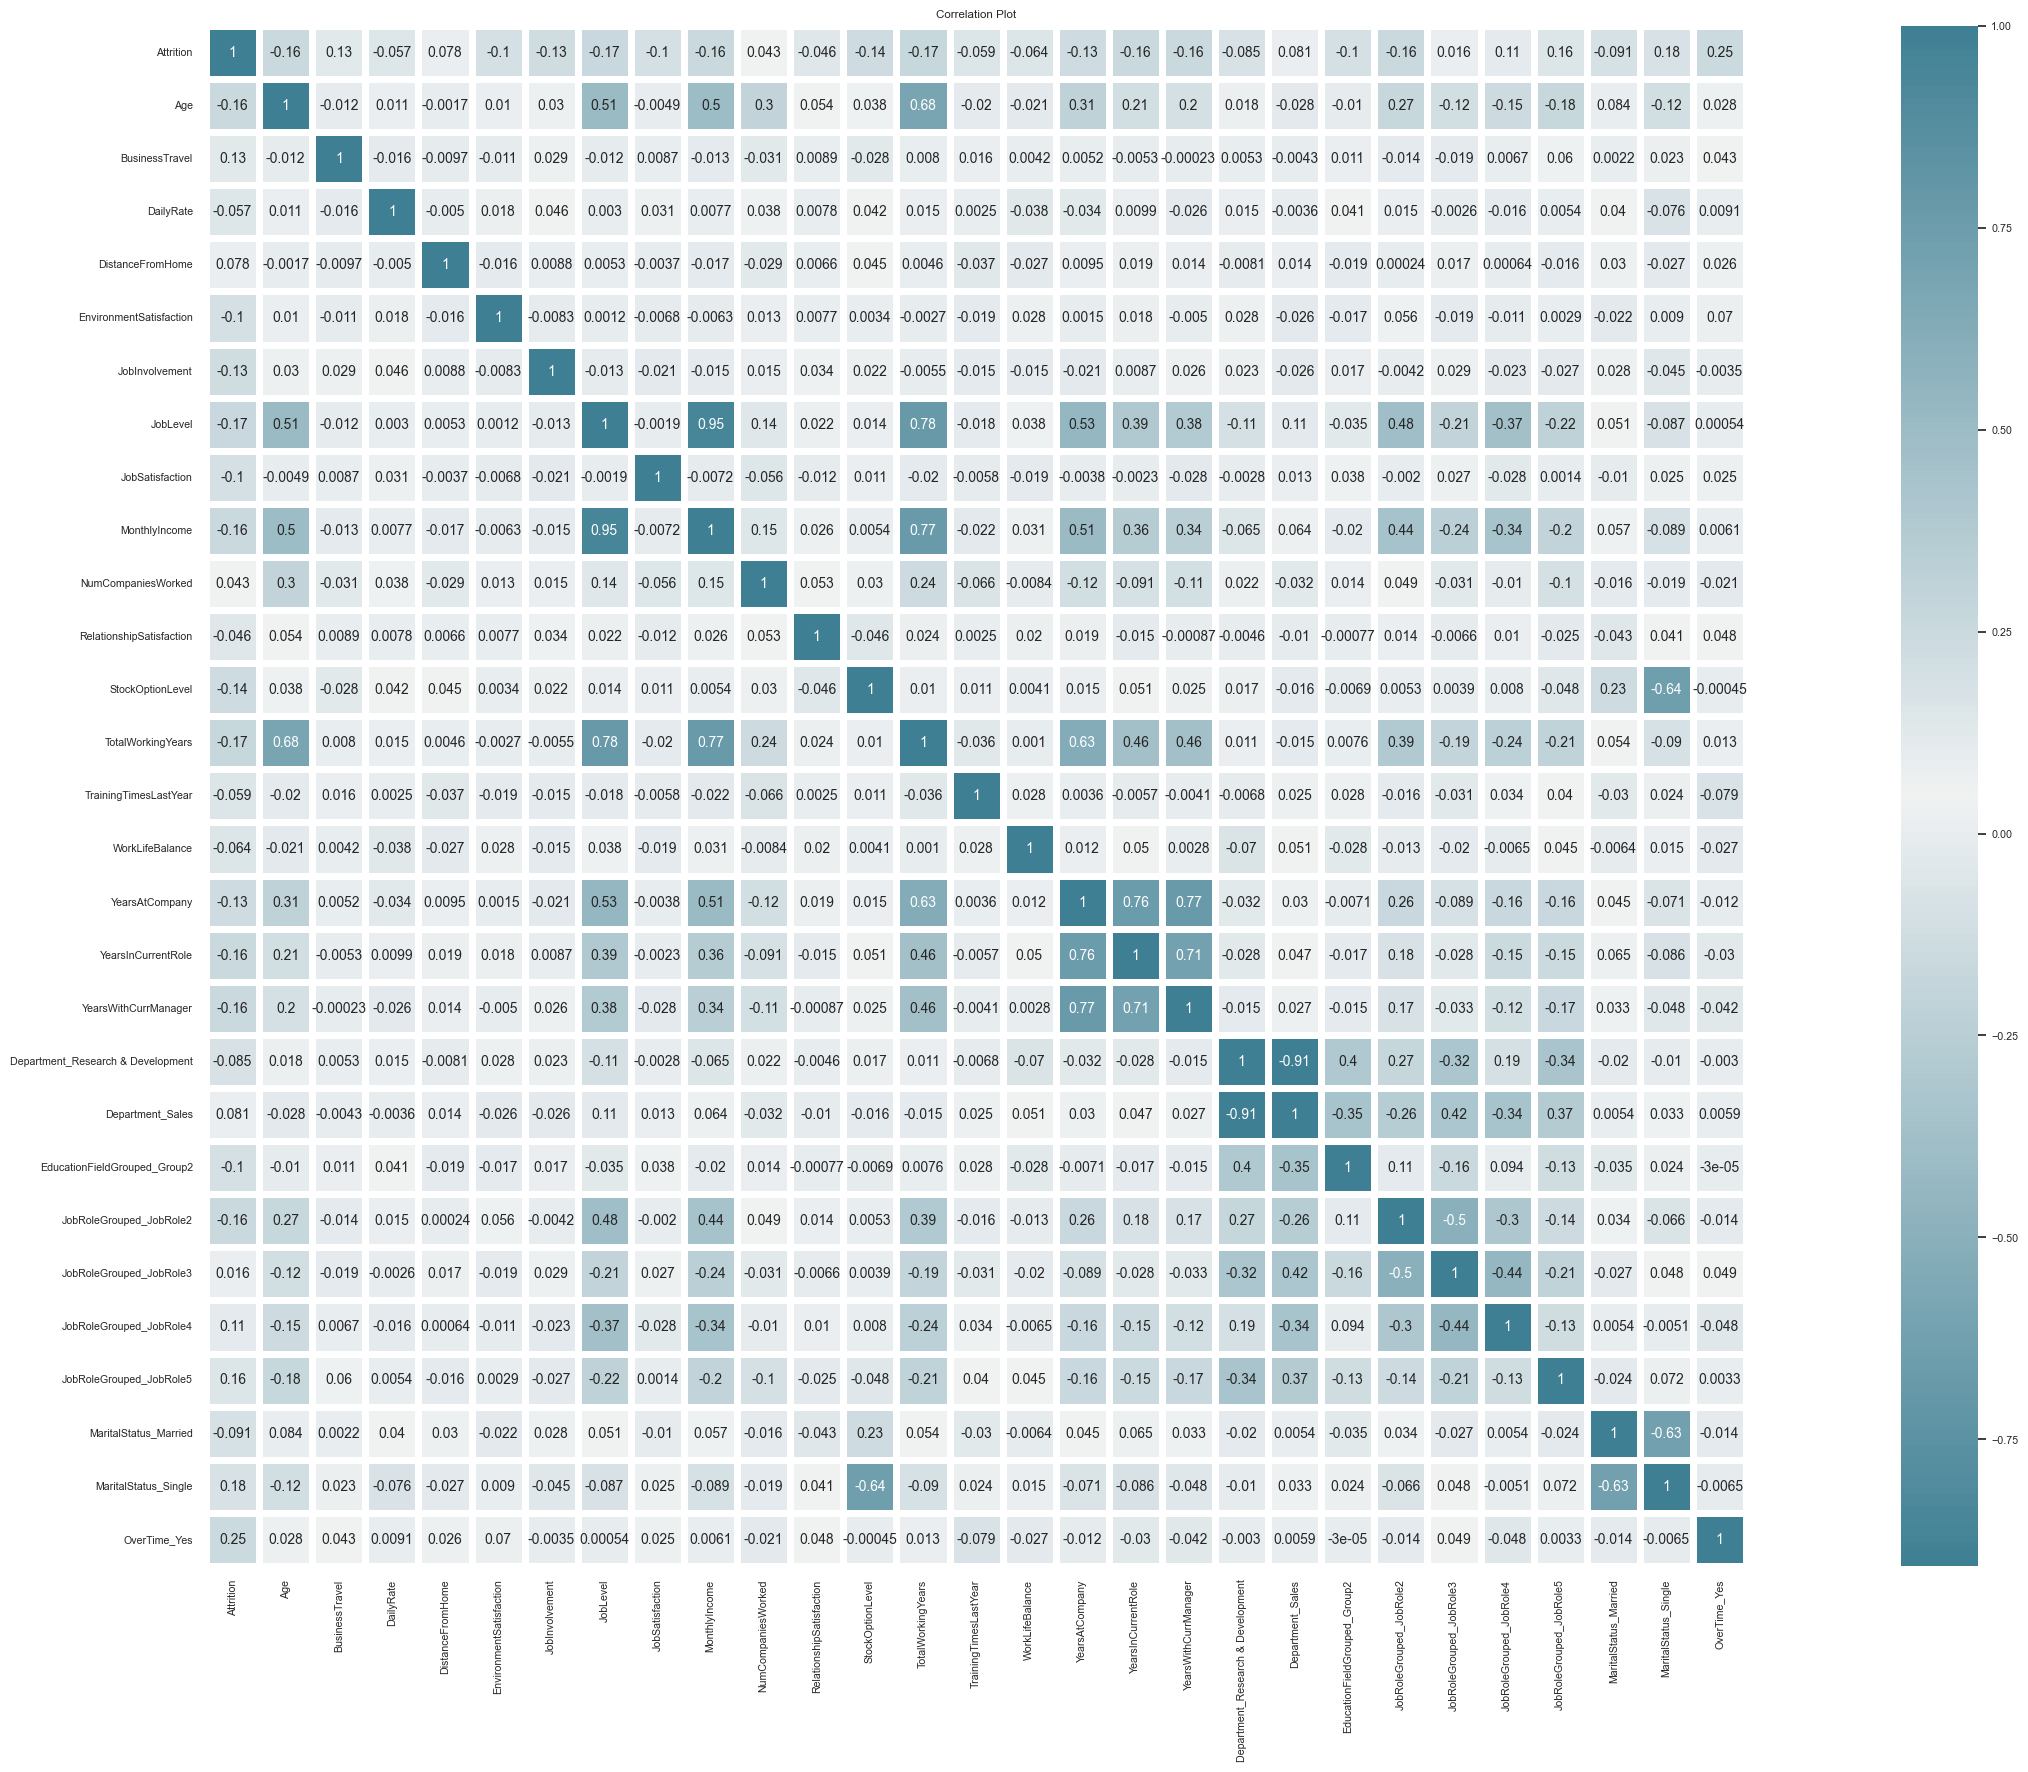

In [82]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
correlation_matrix = df.corr()

pallete = sns.diverging_palette(220, 220, as_cmap=True)
sns.heatmap(correlation_matrix,linewidths=5, annot=True, square=True,annot_kws={'size': 10}, cmap=pallete)

In [83]:
# Getting highly correlated features to drop one of them to avoid multicollinearity
mask = correlation_matrix.abs() > 0.6
highly_correlated_features = []

for feature in mask.columns:
    for correlated_feature in mask.index[mask[feature]].tolist():
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
Age and TotalWorkingYears
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
StockOptionLevel and MaritalStatus_Single
TotalWorkingYears and YearsAtCompany
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
YearsInCurrentRole and YearsWithCurrManager
Department_Research & Development and Department_Sales
MaritalStatus_Married and MaritalStatus_Single


In [84]:
to_drop = ["JobLevel", "TotalWorkingYears","YearsInCurrentRole", "YearsWithCurrManager"]
df.drop(columns=to_drop, inplace=True)

In [85]:
print(len(df.columns)-1)
df.columns.to_list()

24


['Attrition',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'Department_Research & Development',
 'Department_Sales',
 'EducationFieldGrouped_Group2',
 'JobRoleGrouped_JobRole2',
 'JobRoleGrouped_JobRole3',
 'JobRoleGrouped_JobRole4',
 'JobRoleGrouped_JobRole5',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_Yes']

## Pre-processing 

In [86]:
def preprocess_data(df, target_variable, test_size=0.2, random_state=42, normalization_method='minmax'):
    """
    Preprocesses the data by performing the following steps:
    1. Splitting the data into features and target variable.
    2. Splitting the data into training and testing sets.
    3. Applying SMOTE to address class imbalance.
    4. Normalizing the data using MinMaxScaler or StandardScaler.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - target_variable (str): The name of the target variable.
    - test_size (float): The proportion of the dataset to include in the test split.
    - random_state (int): Seed for random number generation.
    - normalization_method (str): The normalization method to use ('minmax' or 'standard').

    Returns:
    - X_train, X_test, y_train, y_test: The preprocessed training and testing sets.
    """

    # Step 1: Split the data into features (X) and target variable (y)
    X = df.drop(columns=[target_variable])
    y = df[target_variable]

    # Step 2: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Step 3: Apply SMOTE to address class imbalance
    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Step 4: Normalize the data
    if normalization_method == 'minmax':
        scaler = MinMaxScaler()
    elif normalization_method == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid normalization method. Choose 'minmax' or 'standard'.")

    X_train_normalized = scaler.fit_transform(X_train_resampled)
    X_test_normalized = scaler.transform(X_test)

    return X_train_normalized, X_test_normalized, y_train_resampled, y_test

X_train, X_test, y_train, y_test = preprocess_data(df, target_variable='Attrition')


## Model development and Evaluation

In [87]:

def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the performance of a classification model on training and test sets.

    Parameters:
    - model: The classification model to be evaluated.
    - X_train, X_test: The feature matrices for training and test sets.
    - y_train, y_test: The target variables for training and test sets.

    Returns:
    - results_df (pd.DataFrame): DataFrame containing evaluation metrics for training and test sets.
    - trained_model: The trained classification model.
    """

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions and probability estimates on the training set
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # Make predictions and probability estimates on the test set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    metrics_dict = {
        'Model': type(model).__name__,
        'Accuracy (Training Set)': accuracy_score(y_train, y_train_pred),
        'Recall (Training Set)': recall_score(y_train, y_train_pred),
        'Precision (Training Set)': precision_score(y_train, y_train_pred),
        'F1 Score (Training Set)': f1_score(y_train, y_train_pred),
        'ROC AUC (Training Set)': roc_auc_score(y_train, y_train_prob),
        
        'Accuracy (Test Set)': accuracy_score(y_test, y_test_pred),
        'Recall (Test Set)': recall_score(y_test, y_test_pred),
        'Precision (Test Set)': precision_score(y_test, y_test_pred),
        'F1 Score (Test Set)': f1_score(y_test, y_test_pred),
        'ROC AUC (Test Set)': roc_auc_score(y_test, y_test_prob)
    }
    # Create a DataFrame from the metrics_dict
    results_df = pd.DataFrame(metrics_dict, index=[0])

    return results_df , model

model = RandomForestClassifier(random_state=42)
results_df, model = evaluate_model_performance(model, X_train, X_test, y_train, y_test)
results_df

,Model,Accuracy (Training Set),Recall (Training Set),Precision (Training Set),F1 Score (Training Set),ROC AUC (Training Set),Accuracy (Test Set),Recall (Test Set),Precision (Test Set),F1 Score (Test Set),ROC AUC (Test Set)
0,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,0.97619,0.89899,0.956989,0.927083,0.986594


In [88]:
estimator = [] 
estimator.append(('LR', LogisticRegression(solver ='lbfgs', max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 
estimator.append(('KNN', KNeighborsClassifier()))
estimator.append(('GNB', GaussianNB()))
estimator.append(('RF', RandomForestClassifier()))
estimator.append(('ABC', AdaBoostClassifier()))
estimator.append(('GBC', GradientBoostingClassifier()))
estimator.append(('XGB', XGBClassifier()))

models_list = [
        DecisionTreeClassifier(),
        LogisticRegression(),
        SVC(probability=True),
        KNeighborsClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        VotingClassifier(estimators=estimator ,voting ='soft'),
        XGBClassifier()
    ]

trained_models = []
res = pd.DataFrame()
for model in models_list:
    result_df,trained_model = evaluate_model_performance(model, X_train, X_test, y_train, y_test)
    trained_models.append(trained_model)
    res = pd.concat([res,result_df])

models_dict = dict(zip([type(model).__name__ for model in trained_models], trained_models))
models_dict.keys()

dict_keys(['DecisionTreeClassifier', 'LogisticRegression', 'SVC', 'KNeighborsClassifier', 'GaussianNB', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'VotingClassifier', 'XGBClassifier'])

In [89]:
def color_background(val):
    if 'Training Set' in val.name:
        return ['background-color: #34738f']* len(val)
    elif 'Test Set' in val.name:
        return ['background-color: #be3e2b']* len(val)
    else:
        return ['']* len(val)


# Apply the styler
styled_res= res.set_index('Model').style.apply(color_background, axis=0)

# Display the styled DataFrame
styled_res

,Accuracy (Training Set),Recall (Training Set),Precision (Training Set),F1 Score (Training Set),ROC AUC (Training Set),Accuracy (Test Set),Recall (Test Set),Precision (Test Set),F1 Score (Test Set),ROC AUC (Test Set)
Model,,,,,,,,,,
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.952381,0.858586,0.858586,0.858586,0.914978
LogisticRegression,0.851037,0.833080,0.864113,0.848313,0.915517,0.831633,0.696970,0.500000,0.582278,0.828489
SVC,0.950177,0.936773,0.962578,0.949500,0.985725,0.879252,0.626263,0.645833,0.635897,0.896759
KNeighborsClassifier,0.941578,0.975215,0.913744,0.943479,0.992924,0.836735,0.656566,0.511811,0.575221,0.871465
GaussianNB,0.784775,0.831563,0.760407,0.794395,0.860960,0.734694,0.696970,0.353846,0.469388,0.798393
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.976190,0.898990,0.956989,0.927083,0.985644
AdaBoostClassifier,0.866464,0.865959,0.866835,0.866397,0.942787,0.807823,0.696970,0.453947,0.549801,0.839541
GradientBoostingClassifier,0.941072,0.929186,0.951813,0.940363,0.984367,0.875850,0.717172,0.612069,0.660465,0.895230
VotingClassifier,0.993424,0.992413,0.994425,0.993418,0.999714,0.947279,0.838384,0.846939,0.842640,0.975667


> The models can be tuned for better performance using cross validation or grid or ..

In the analysis of an employee attrition dataset where the label column is imbalanced (16.1% leave the company), it's essential to consider metrics beyond accuracy. Here are some key metrics to focus on:

> Precision

-  It is the ratio of true positive predictions to the total number of positive predictions made by the model. It measures the accuracy of the positive predictions.

- $\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $

> Recall (Sensitivity or True Positive Rate)

- It is the ratio of true positive predictions to the total number of actual positive instances. It indicates the model's ability to capture all the positive instances.

- $ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

> F1 Score

- It is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall.

- $ \text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

> ROC AUC

- Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between true positive rate and false positive rate. Area Under the ROC Curve (ROC AUC) summarizes the performance across various classification thresholds.

> These metrics are particularly useful for imbalanced datasets, allowing us to evaluate the model's performance with a focus on both classes. Depending on our project's goals, we may want to prioritize precision or recall, or find a balance with F1 score. ROC AUC provides an overall performance measure across different classification thresholds.


- Our 2 best models are Random Forest and XGBoost both, were well trained and kinda overfitting
- XGBoost scored close values for precision, recall and f1 score unlike random forest which had a little drop in recall and a small increase in precision
- They both score high roc auc values 
- XGBoost is more stable in general unlike random forest which may be more useful in case we care about precision more and less about recall as an example: 
- - Imagine a model predicts that 20 employees will leave the company. Out of those 20 predictions, 15 employees actually leave (True Positives), and 5 do not leave (False Positives).

- - $ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} = \frac{15}{15 + 5} = \frac{15}{20} = 0.75 $

In this case, the precision is 0.75 or 75%. This means that out of all the employees predicted to leave, 75% actually do leave. so if we do predict high rate of attrition we may start doing actions or applying some policies to limit the forecasted issue.


In [90]:
def plot_feature_importance(model, feature_names, title=None):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feature_names[i] for i in indices]

    # Barplot: Add bars
    sns.barplot(y=importances[indices], x=names, palette='rocket')
    # Add feature names as x-axis labels
    plt.xticks(range(len(feature_names)), names, rotation=90, fontsize=8)
    
    # Create dynamic title
    if title is None:
        title = f"Feature Importance - {type(model).__name__}"

    # Set plot title
    plt.title(title)
    # Show plot
    plt.show()
feature_names = np.setdiff1d(df.columns.to_list(), ['Attrition']).tolist()

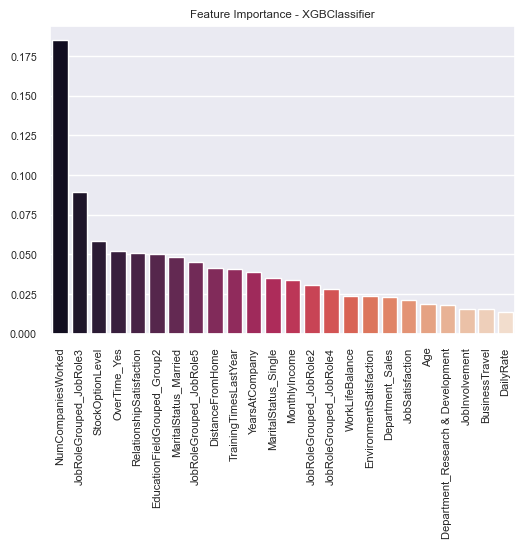

In [91]:
plot_feature_importance(models_dict['XGBClassifier'], feature_names)

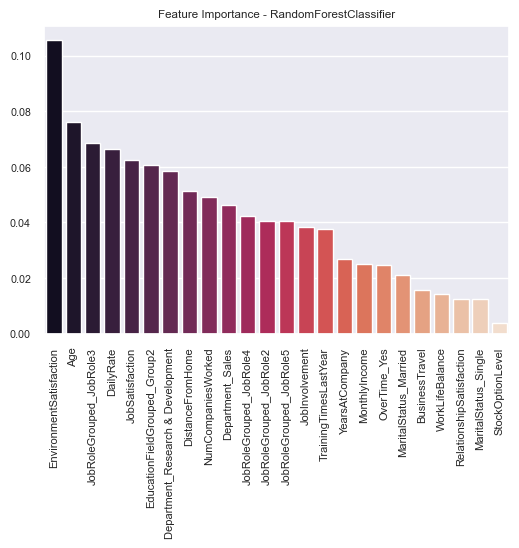

In [92]:
plot_feature_importance(models_dict['RandomForestClassifier'], feature_names)